In [1]:
import sys
import os

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
import seaborn as sns

sys.path.insert(0, '../')
from bayesian.bayesian import infer, infer_assuming_independence
from bayesian.plot_bayesian_nomogram import plot_bayesian_nomogram
from bayesian.plot.plot import plot

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
grid_size = 64

n_permutations_for_roc_p_value = 1000

figure_size = (16, 16)

# Load Titanic data

In [3]:
titanic_data = pd.read_table('../data/titanic.txt', index_col=0)

titanic_data_variables = titanic_data[[
    'sex',
    'age',
    'fare',
    'sibsp',
    'parch',
    'survived',
]].dropna()

titanic_data_variables

sex      age        fare  sibsp  parch  survived
number                                                     
1       female  29.0000  211.337494      0      0         1
2         male   0.9167  151.550003      1      2         1
3       female   2.0000  151.550003      1      2         0
4         male  30.0000  151.550003      1      2         0
5       female  25.0000  151.550003      1      2         0
6         male  48.0000   26.549999      0      0         1
7       female  63.0000   77.958298      1      0         1
8         male  39.0000    0.000000      0      0         0
9       female  53.0000   51.479198      2      0         1
10        male  71.0000   49.504200      0      0         0
11        male  47.0000  227.524994      1      0         0
12      female  18.0000  227.524994      1      0         1
13      female  24.0000   69.300003      0      0         1
14      female  26.0000   78.849998      0      0         1
15        male  80.0000   30.000000      0      0         1
17        male  24.0000  247.520798      0      1         0
18      female  50.0000  247.520798      0      1         1
19      female  32.0000   76.291702      0      0         1
20        male  36.0000   75.241699      0      0         0
21        male  37.0000   52.554199      1      1         1
22      female  47.0000   52.554199      1      1         1
23        male  26.0000   30.000000      0      0         1
24      female  42.0000  227.524994      0      0         1
25      female  29.0000  221.779205      0      0         1
26        male  25.0000   26.000000      0      0         0
27        male  25.0000   91.079201      1      0         1
28      female  19.0000   91.079201      1      0         1
29      female  35.0000  135.633301      0      0         1
30        male  28.0000   26.549999      0      0         1
31        male  45.0000   35.500000      0      0         0
...        ...      ...         ...    ...    ...       ...
1270      male  33.0000    9.500000      0      0         0
1271      male  28.0000    9.500000      0      0         0
1272      male  28.0000    9.500000      0      0         0
1273      male  47.0000    9.000000      0      0         0
1274    female  18.0000   18.000000      2      0         0
1275      male  31.0000   18.000000      3      0         0
1276      male  16.0000   18.000000      2      0         0
1277    female  31.0000   18.000000      1      0         0
1278      male  22.0000    7.225000      0      0         1
1279      male  20.0000    7.854200      0      0         0
1280    female  14.0000    7.854200      0      0         0
1281      male  22.0000    7.895800      0      0         0
1282      male  22.0000    9.000000      0      0         0
1286      male  32.5000    9.500000      0      0         0
1287    female  38.0000    7.229200      0      0         1
1288      male  51.0000    7.750000      0      0         0
1289      male  18.0000    6.495800      1      0         0
1290      male  21.0000    6.495800      1      0         0
1291    female  47.0000    7.000000      1      0         1
1295      male  28.5000   16.100000      0      0         0
1296      male  21.0000    7.250000      0      0         0
1297      male  27.0000    8.662500      0      0         0
1299      male  36.0000    9.500000      0      0         0
1300      male  27.0000   14.454200      1      0         0
1301    female  15.0000   14.454200      1      0         1
1302      male  45.5000    7.225000      0      0         0
1305    female  14.5000   14.454200      1      0         0
1307      male  26.5000    7.225000      0      0         0
1308      male  27.0000    7.225000      0      0         0
1309      male  29.0000    7.875000      0      0         0

[1045 rows x 6 columns]

# Set up variables

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


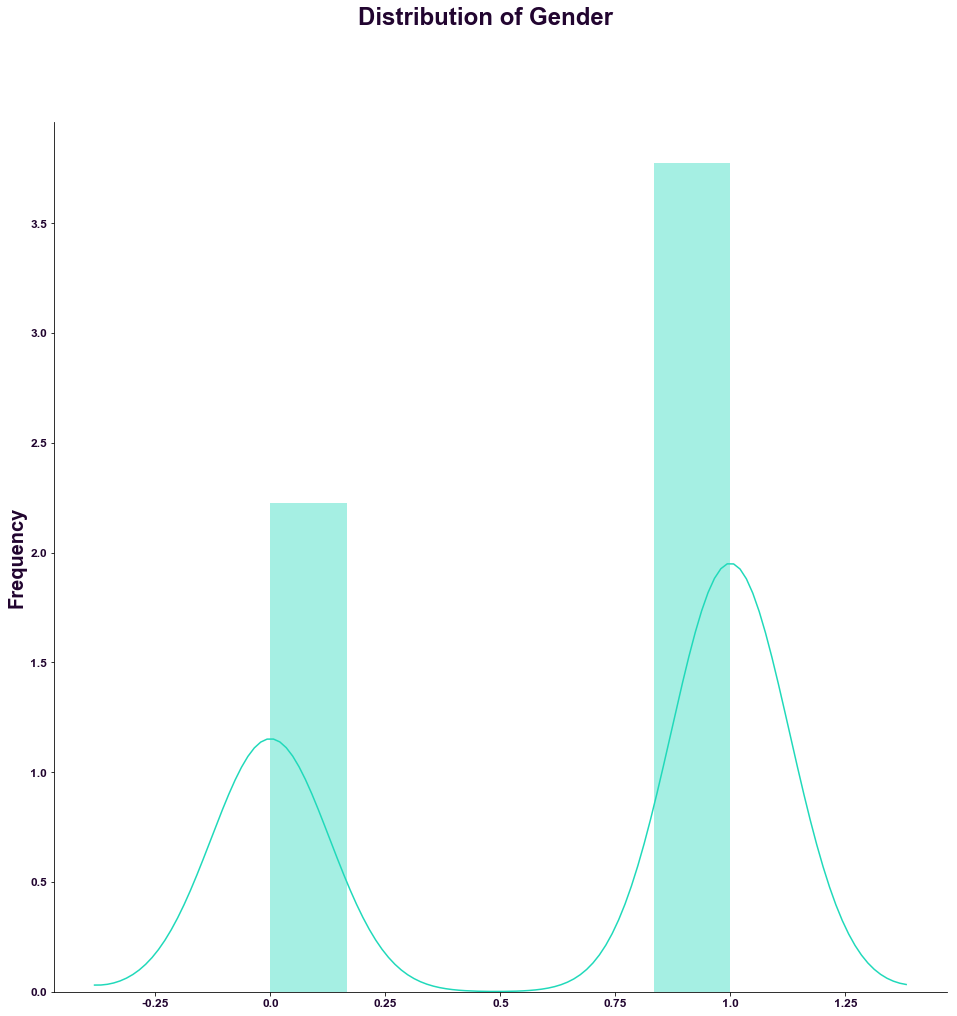

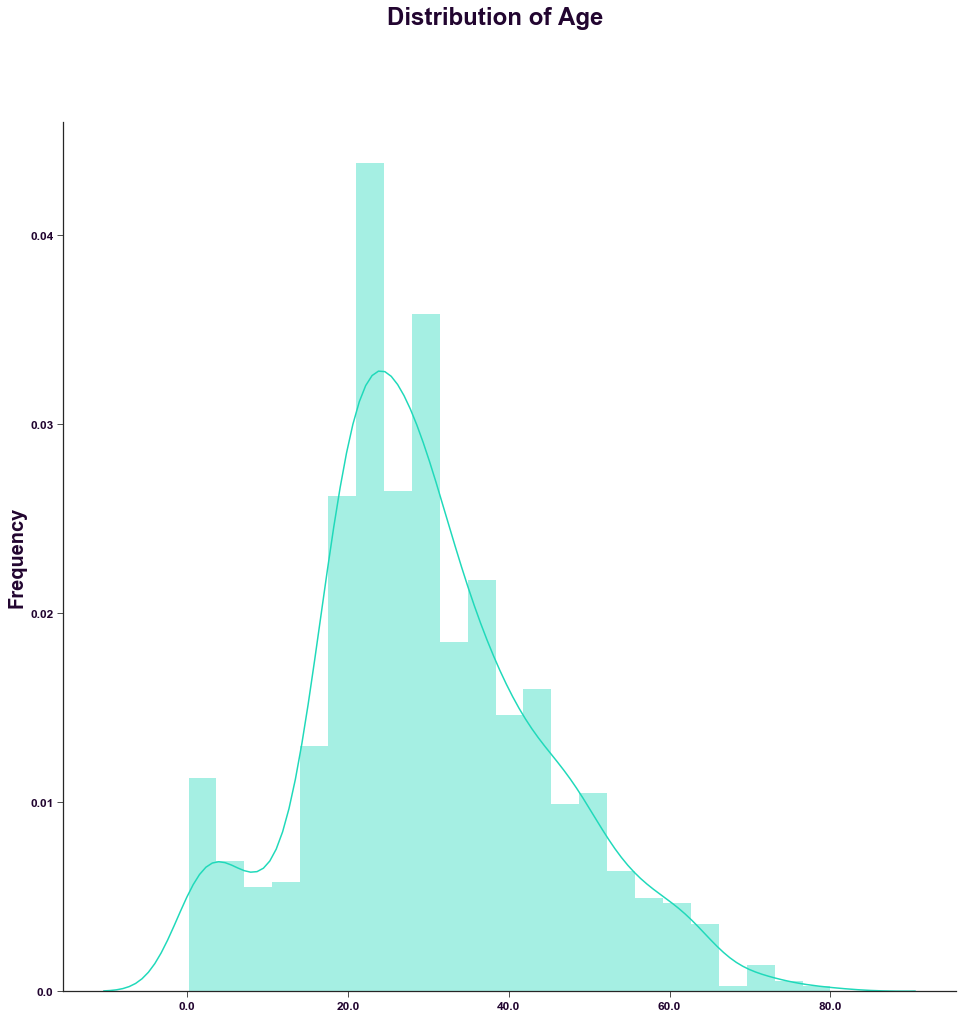

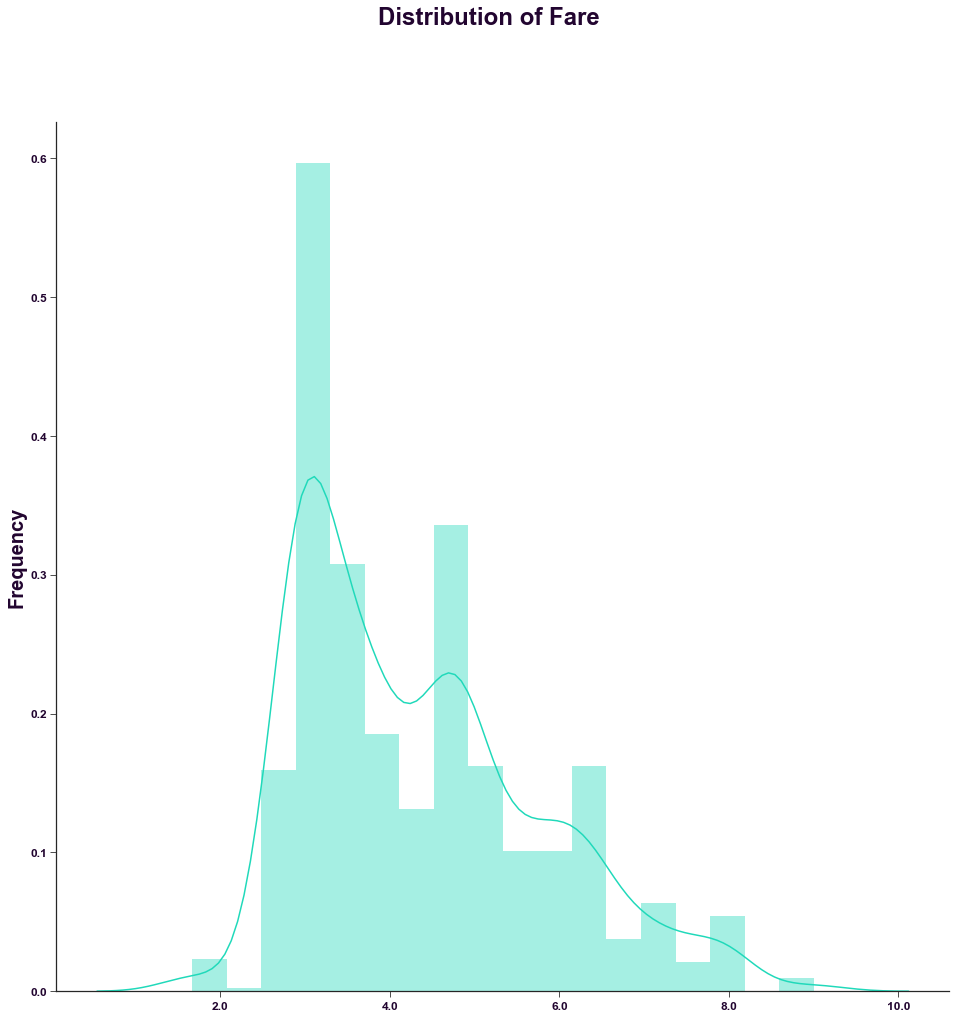

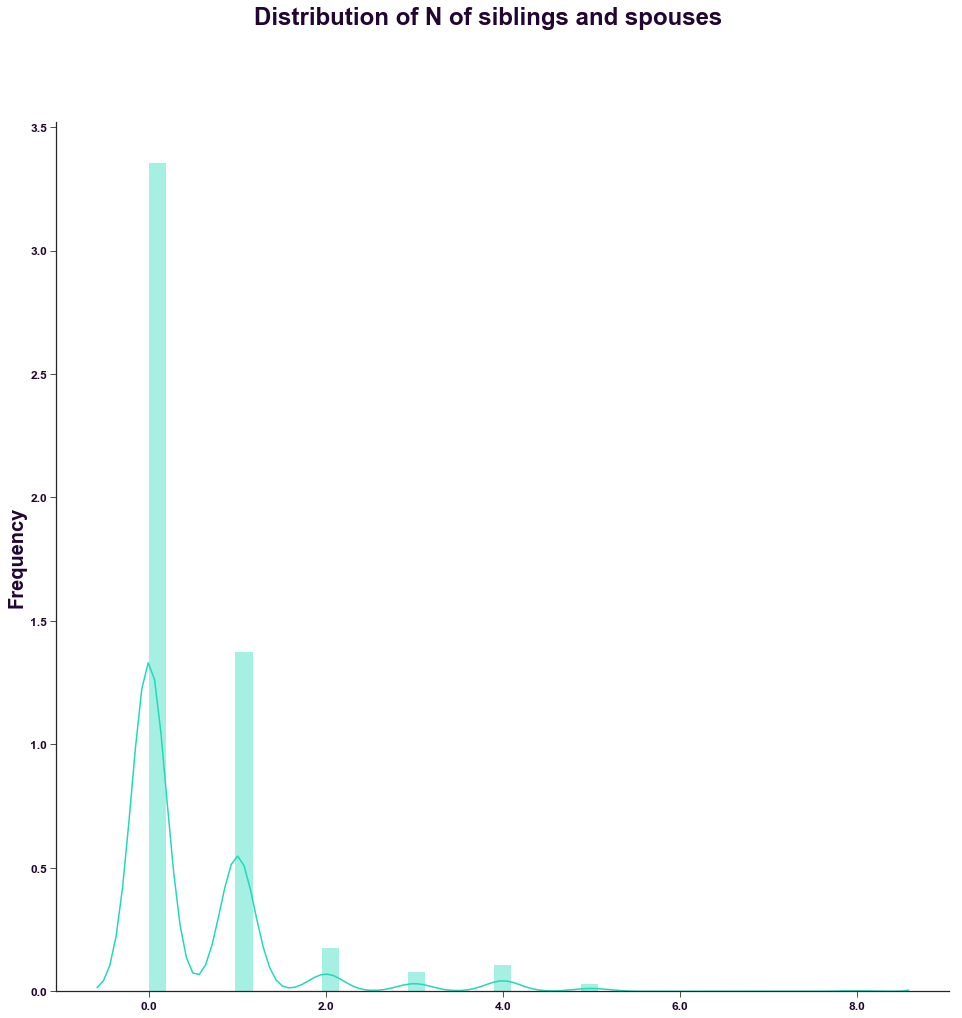

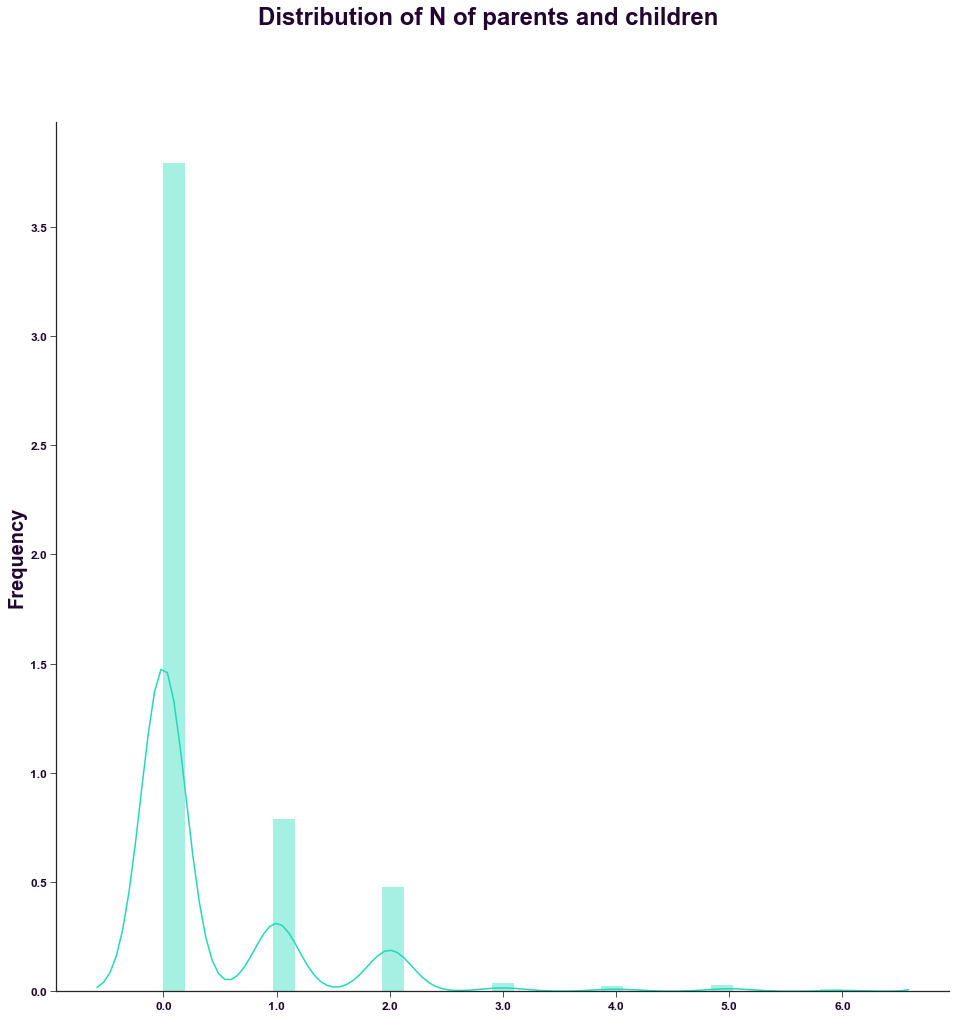

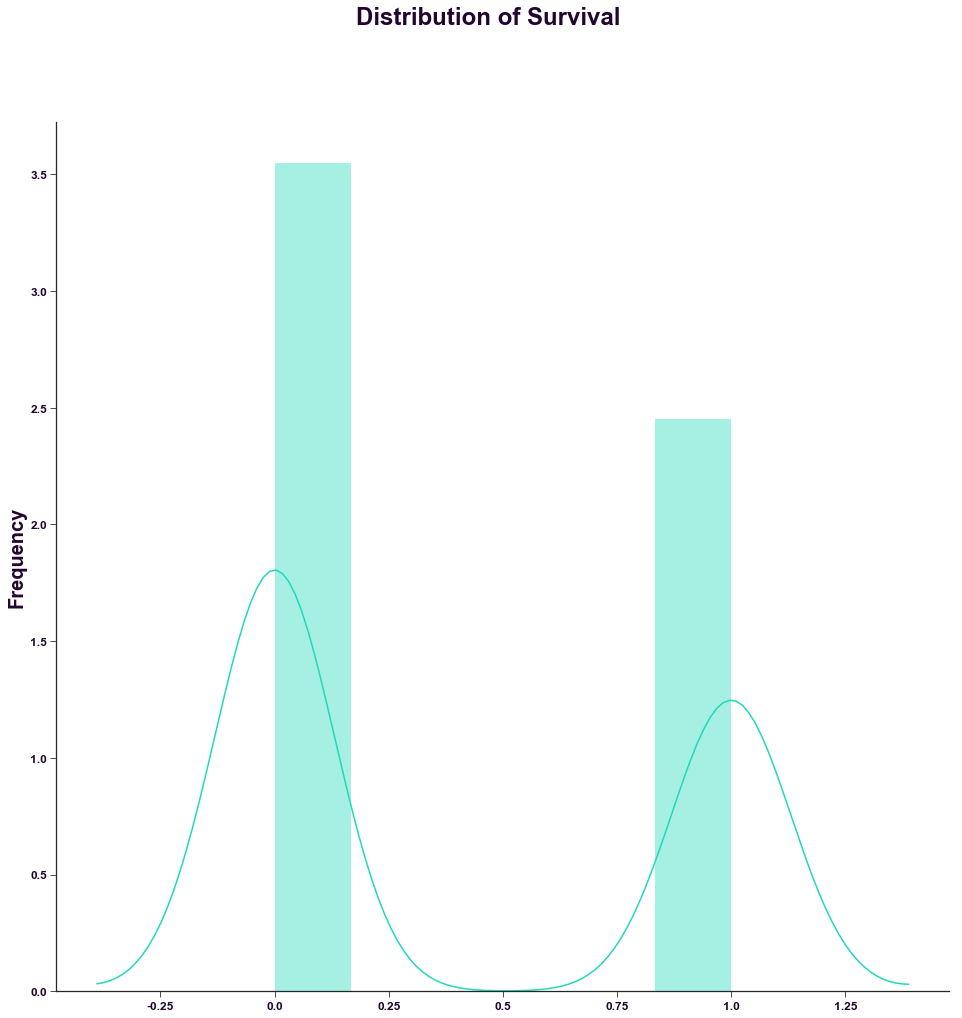

In [4]:
g = np.array(titanic_data_variables['sex'] == 'male', dtype=int)

a = np.array(titanic_data_variables['age'])

f = np.array(titanic_data_variables['fare'])
non_0_min = np.sort(np.unique(f))[1]
f = np.where(f == 0, np.log2(non_0_min), np.log2(f))

nh = np.array(titanic_data_variables['sibsp'])

nv = np.array(titanic_data_variables['parch'])

s = np.array(titanic_data_variables['survived'])

g_name = 'Gender'
a_name = 'Age'
f_name = 'Fare'
nh_name = 'N of siblings and spouses'
nv_name = 'N of parents and children'
s_name = 'Survival'

plot.plot_distribution(
    g, title='Distribution of {}'.format(g_name), figure_size=figure_size)
plot.plot_distribution(
    a, title='Distribution of {}'.format(a_name), figure_size=figure_size)
plot.plot_distribution(
    f, title='Distribution of {}'.format(f_name), figure_size=figure_size)
plot.plot_distribution(
    nh, title='Distribution of {}'.format(nh_name), figure_size=figure_size)
plot.plot_distribution(
    nv, title='Distribution of {}'.format(nv_name), figure_size=figure_size)
plot.plot_distribution(
    s, title='Distribution of {}'.format(s_name), figure_size=figure_size)

# Compute P(S)

In [5]:
p_s1 = s.sum() / s.size

print(p_s1)

0.408612440191


# Compute P(S = 1 | V)


Infering ...
	Computing P(variables)...
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KDE instance
Number of variables: k_vars = 2
Number of samples:   nobs = 1045
Variable types:      cc
BW selection method: normal_reference

KDE bandwidth: [ 0.16076891  0.16357303]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


	Computing P(target variable | non-target variables) ...
	Getting target grid coordinates ...
	Computing P(target variable = target | non-target variables) ...

Infering ...
	Computing P(variables)...
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KDE instance
Number of variables: k_vars = 2
Number of samples:   nobs = 1045
Variable types:      cc
BW selection method: normal_reference

KDE bandwidth: [ 4.78573448  0.16357303]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	Computing P(target variable | non-target variables) ...
	Getting target grid coordinates ...
	Computing P(target variable = target | non-target variables) ...

Infering ...
	Computing P(variables)...
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KDE instance
Number of variables: k_vars = 2
Number of samples:   nobs = 1045
Variable types:      cc
BW selection method: normal_reference

KDE bandwidth: [ 0.47161131  0.16357303]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

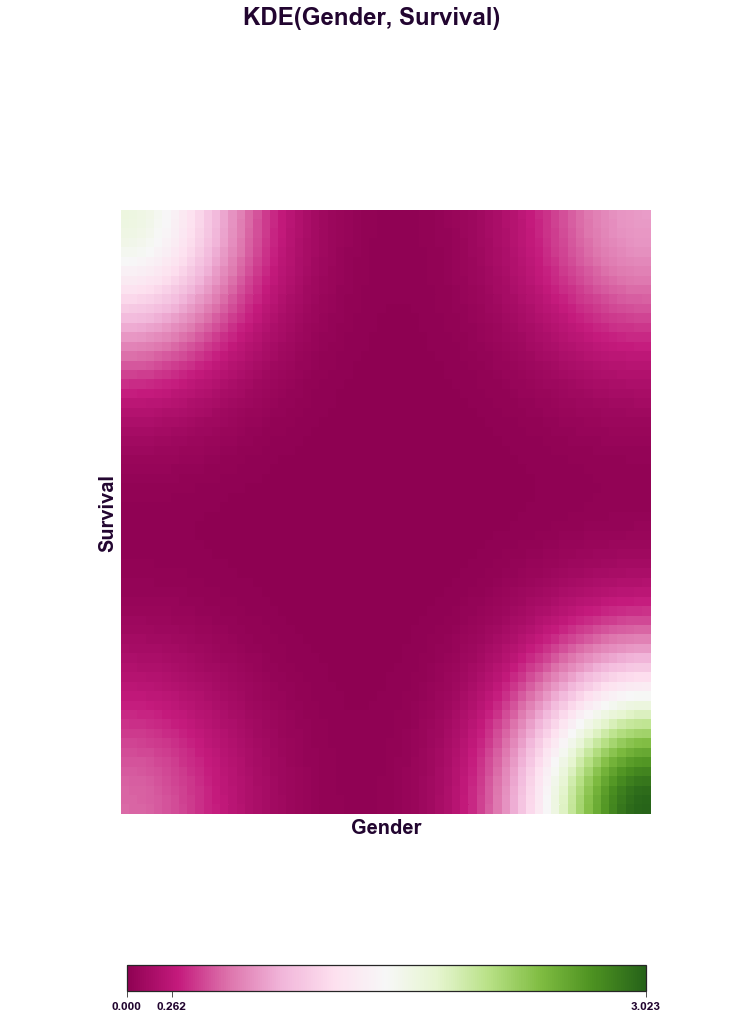

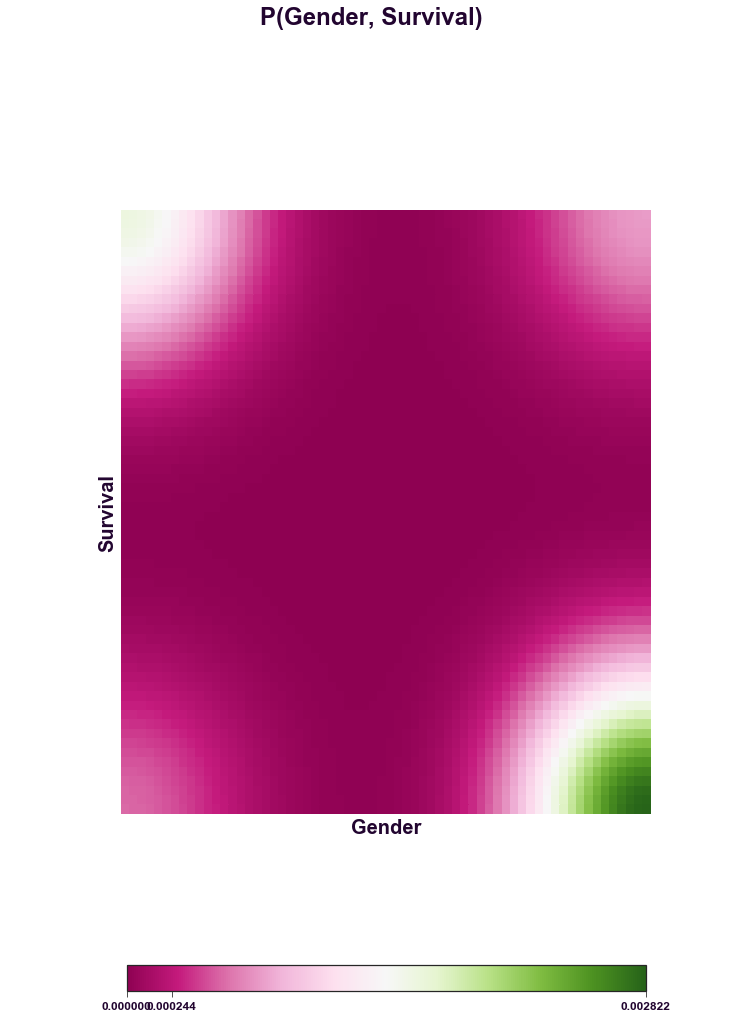

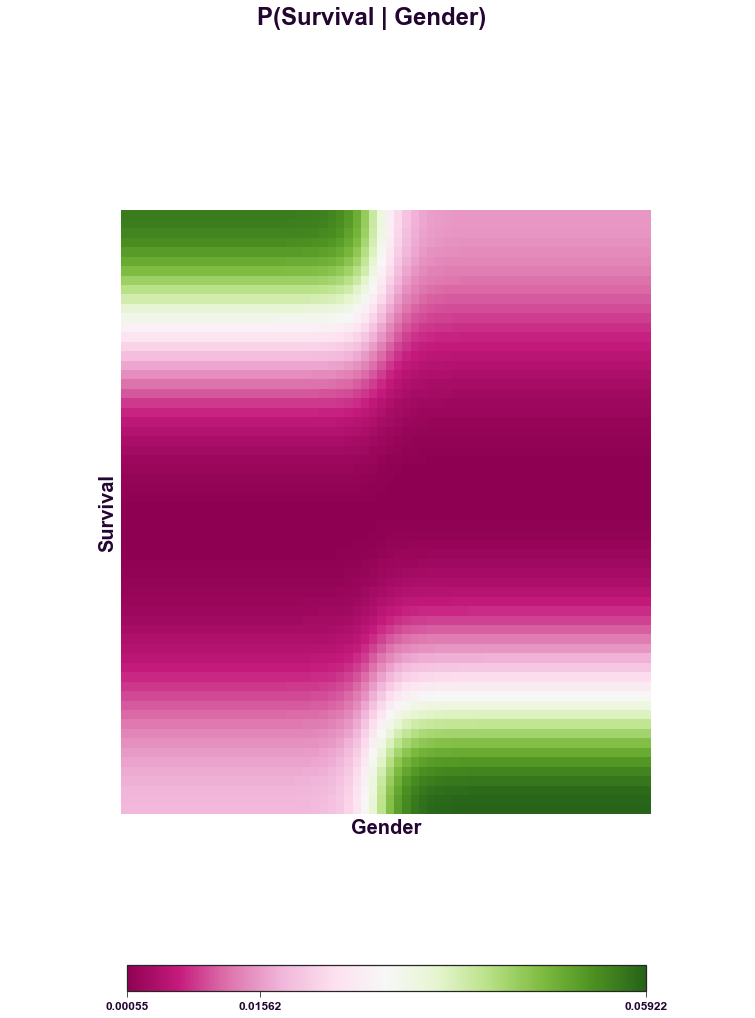

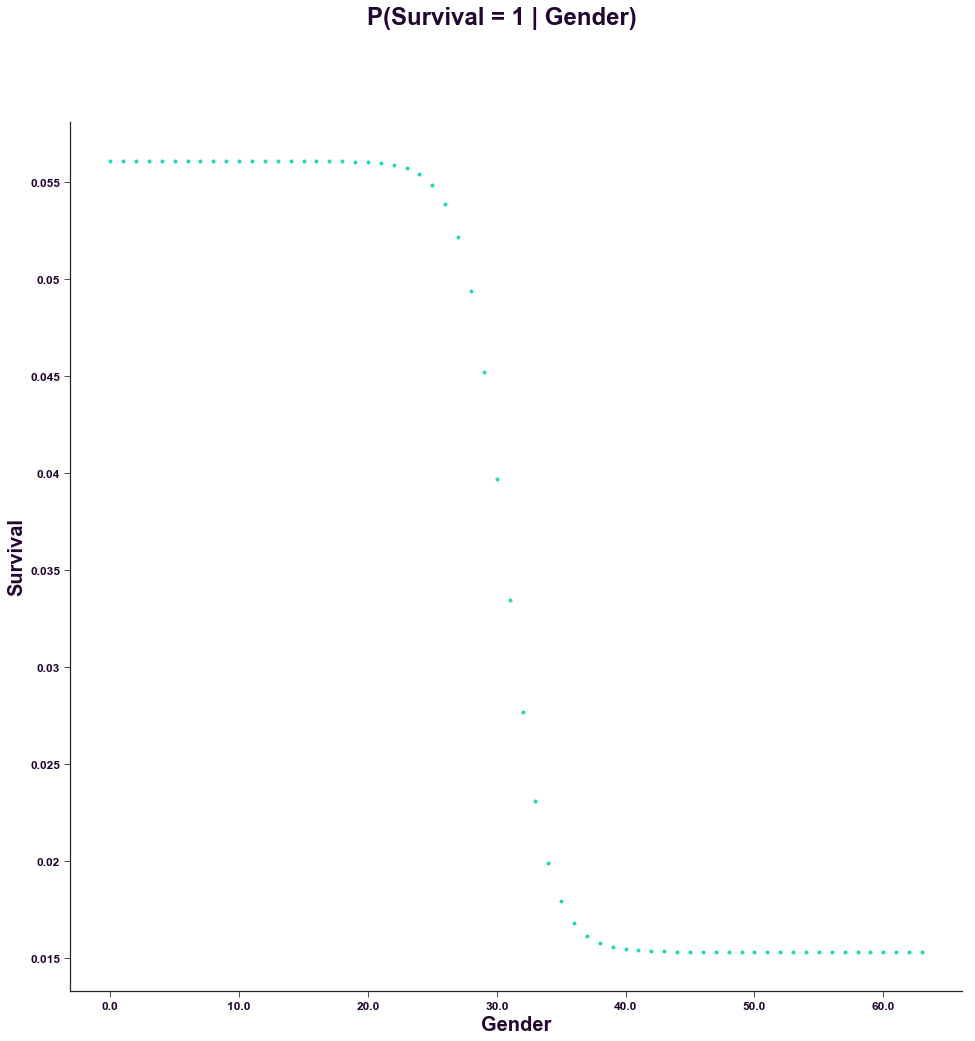

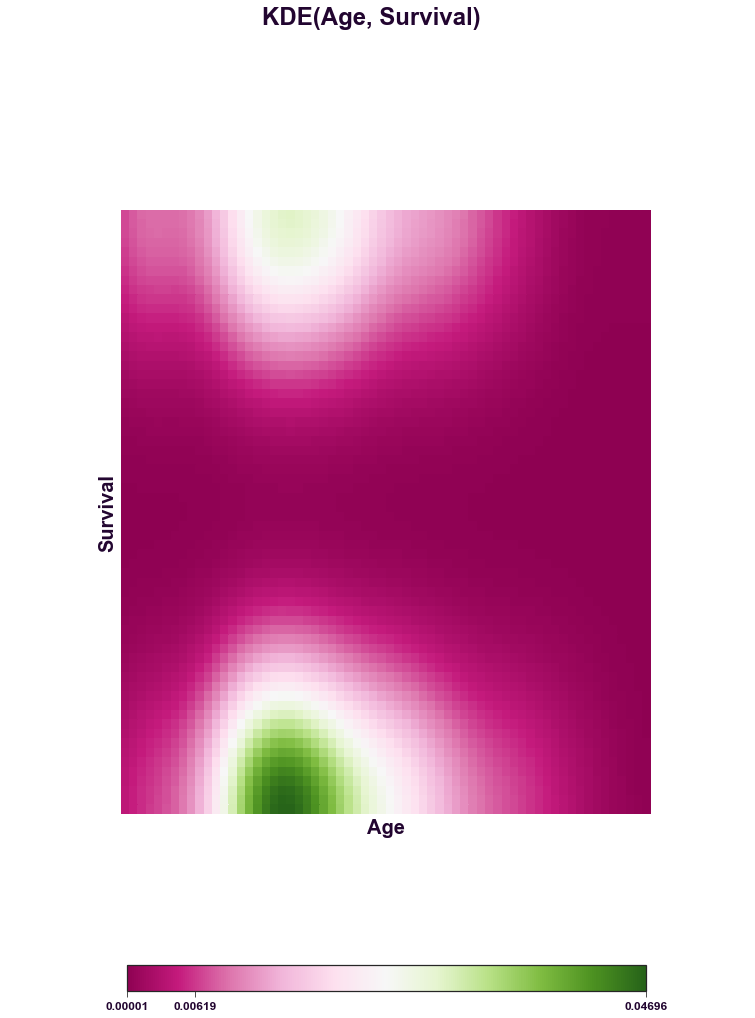

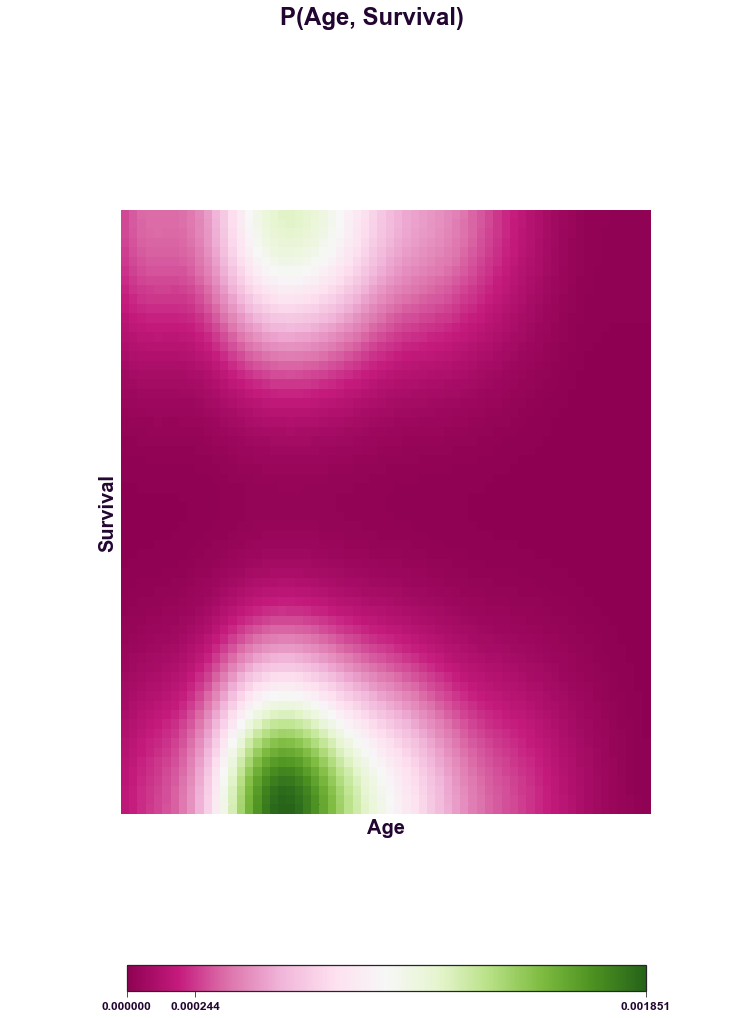

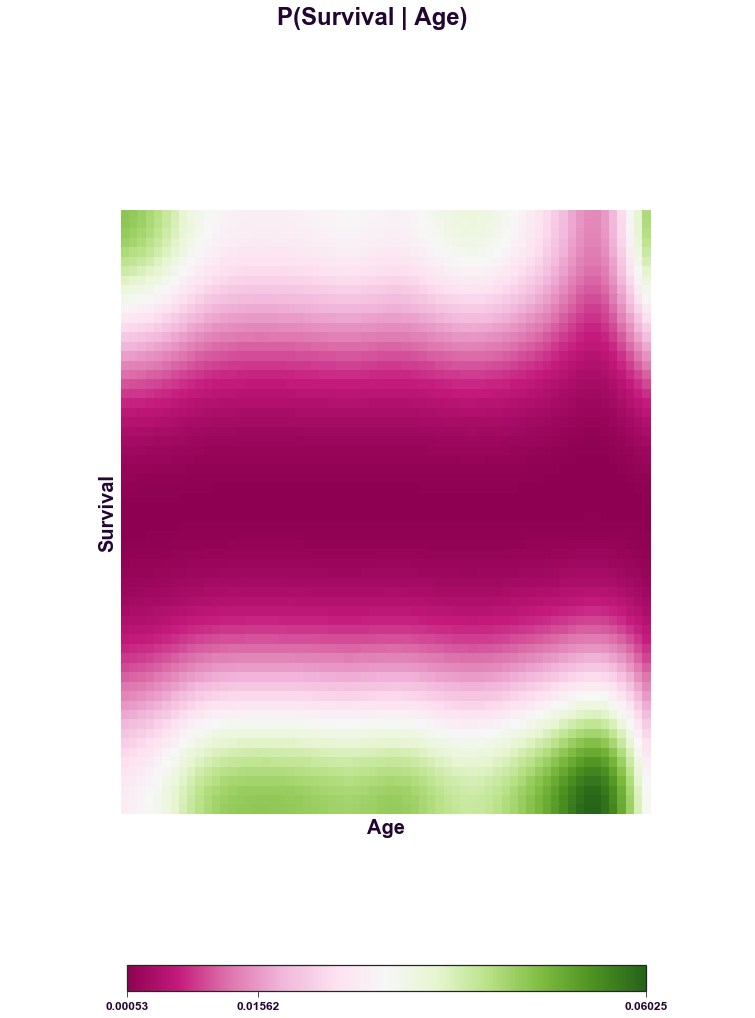

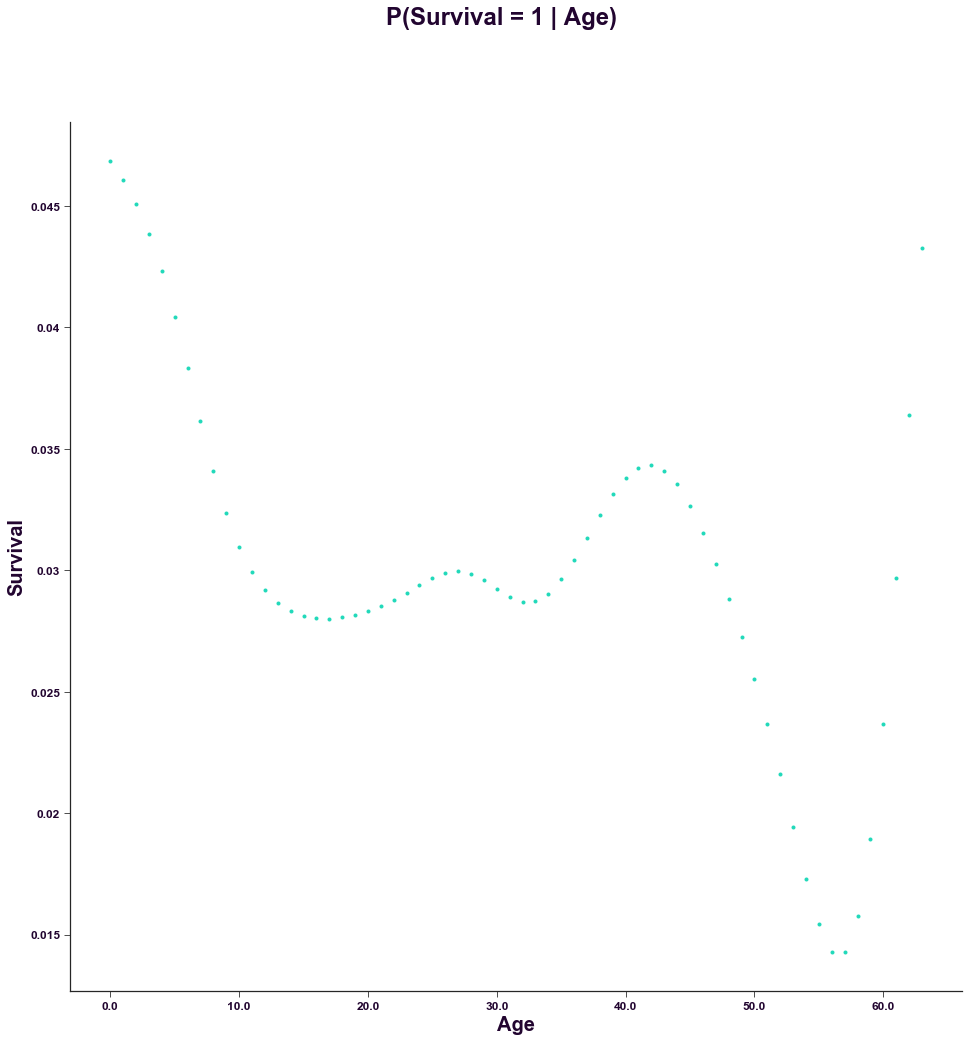

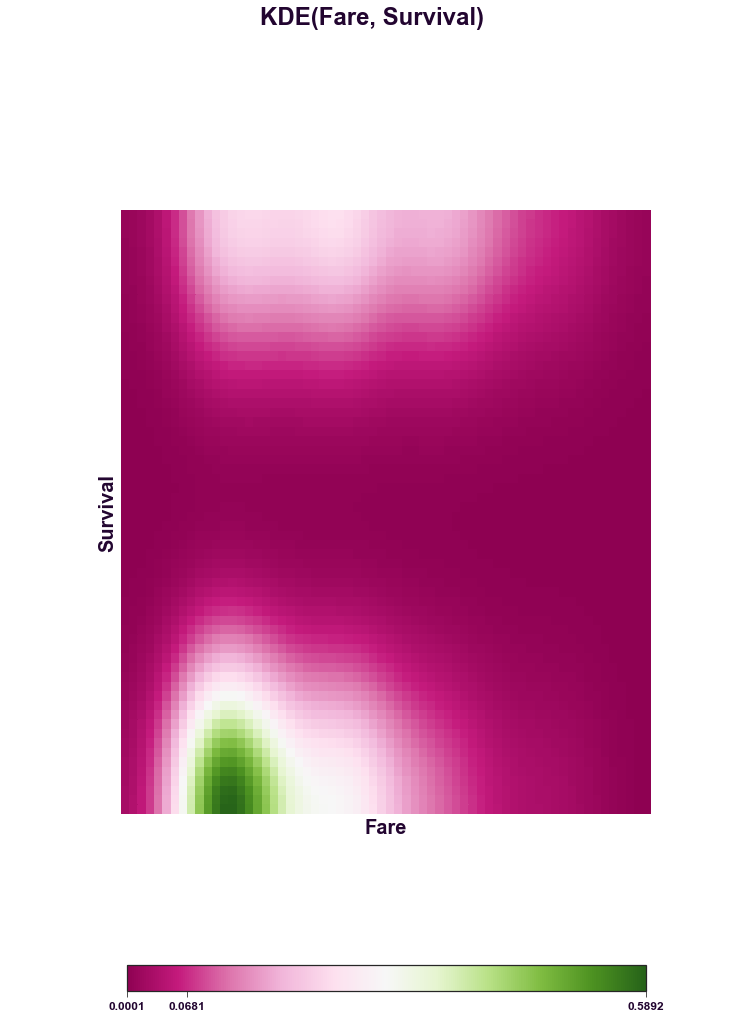

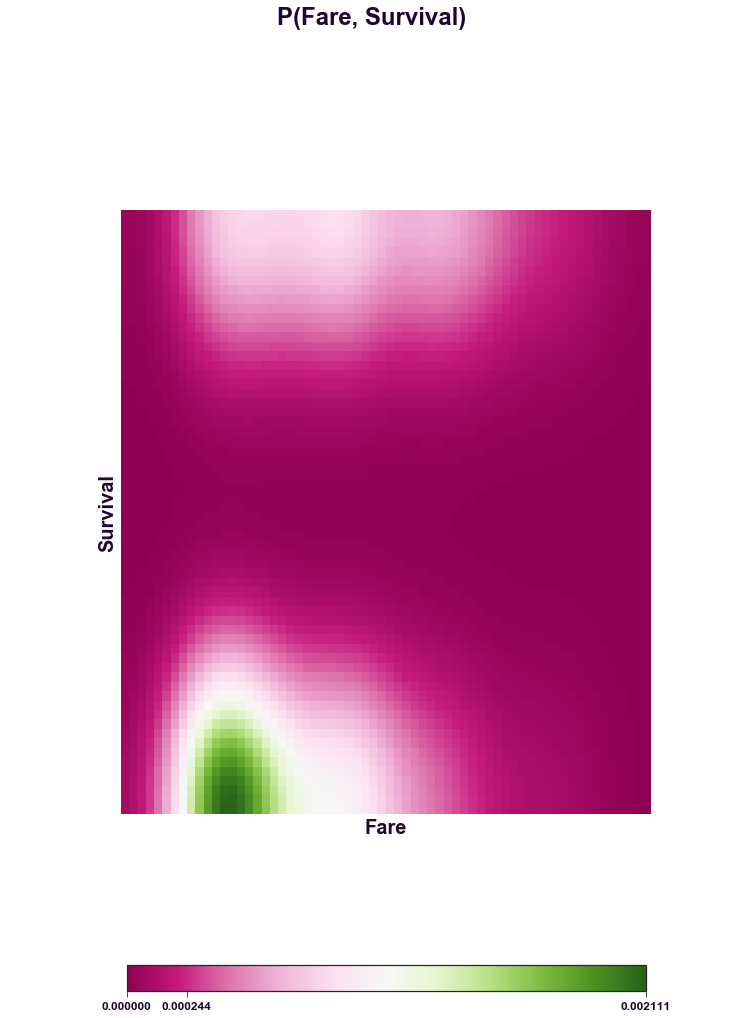

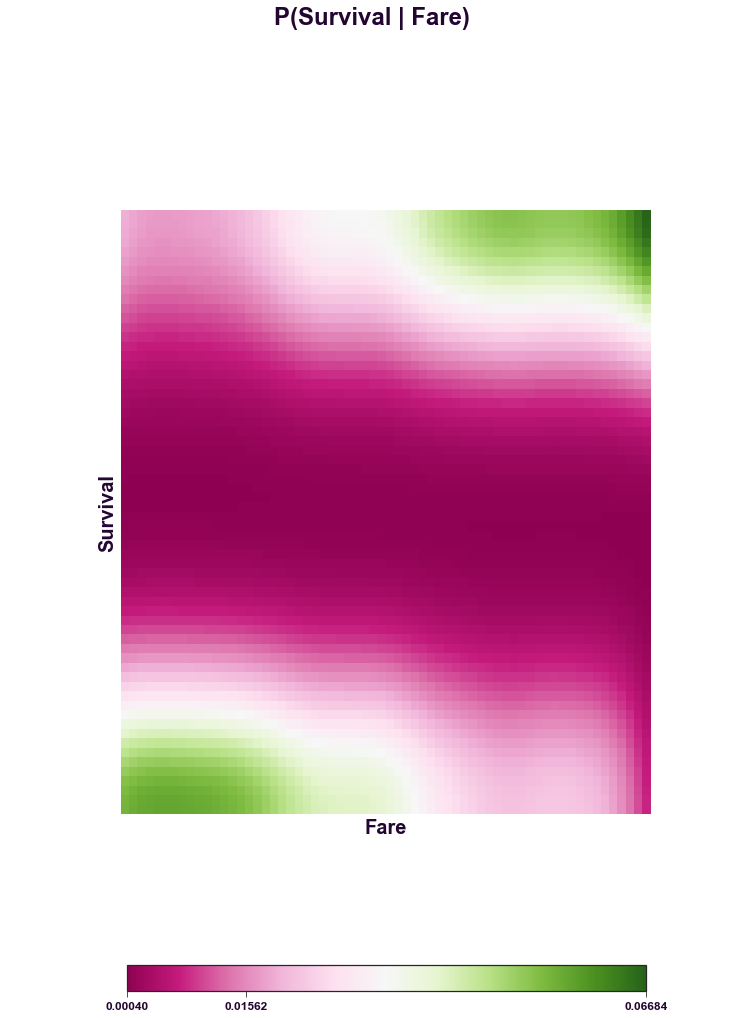

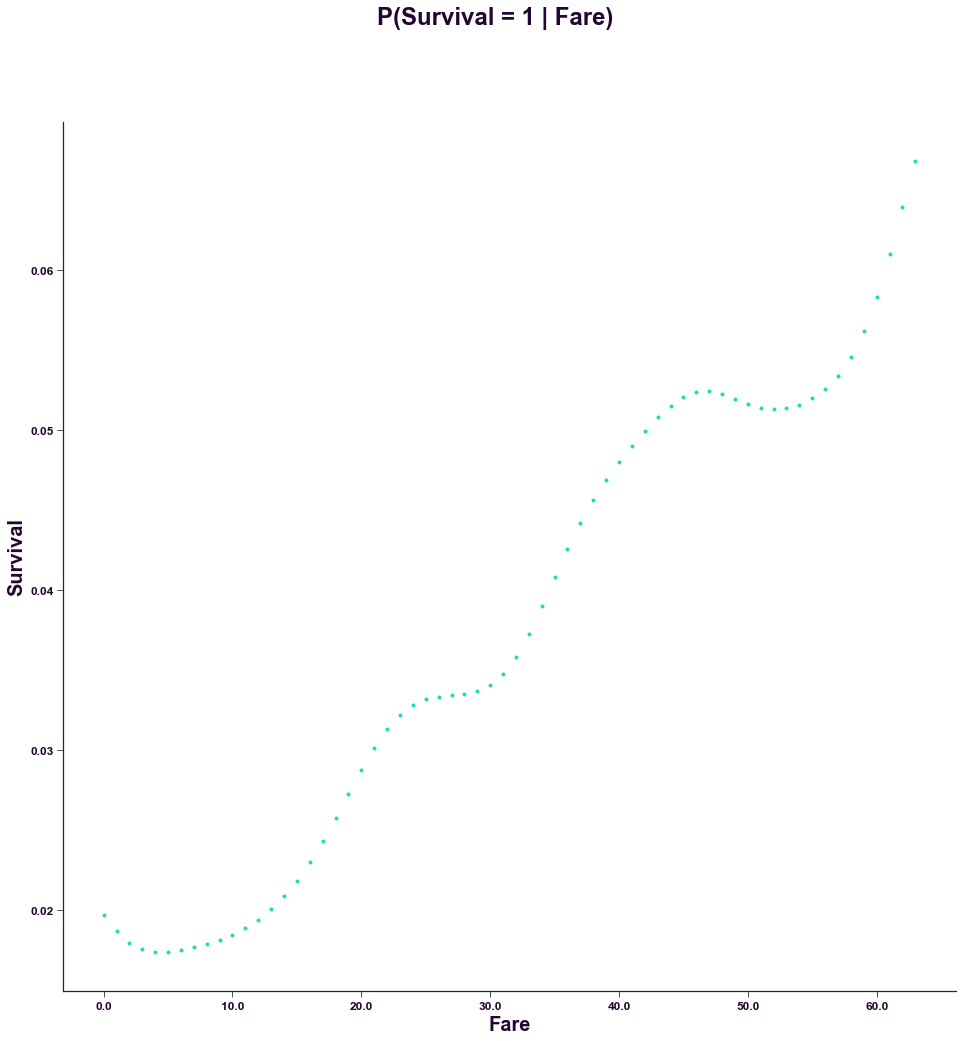

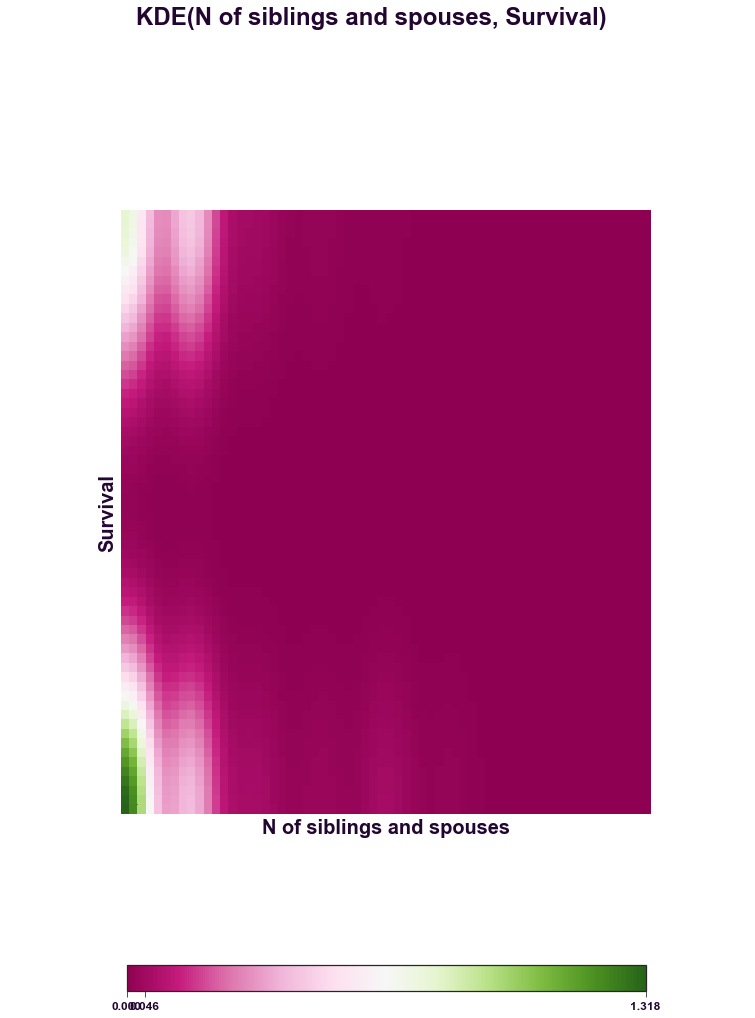

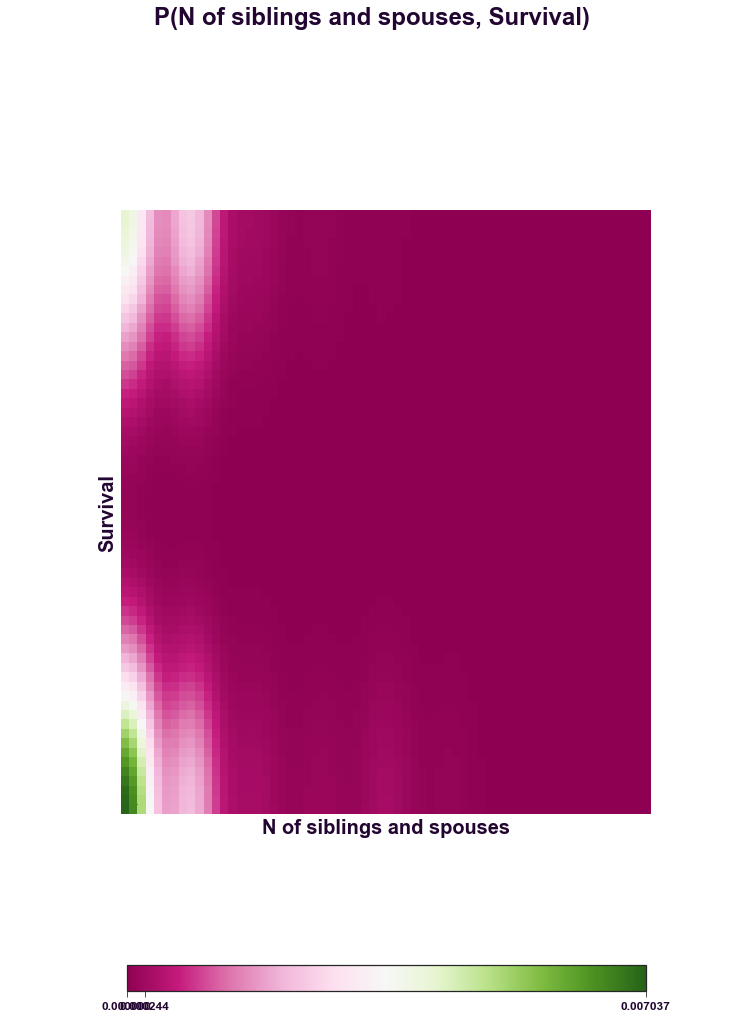

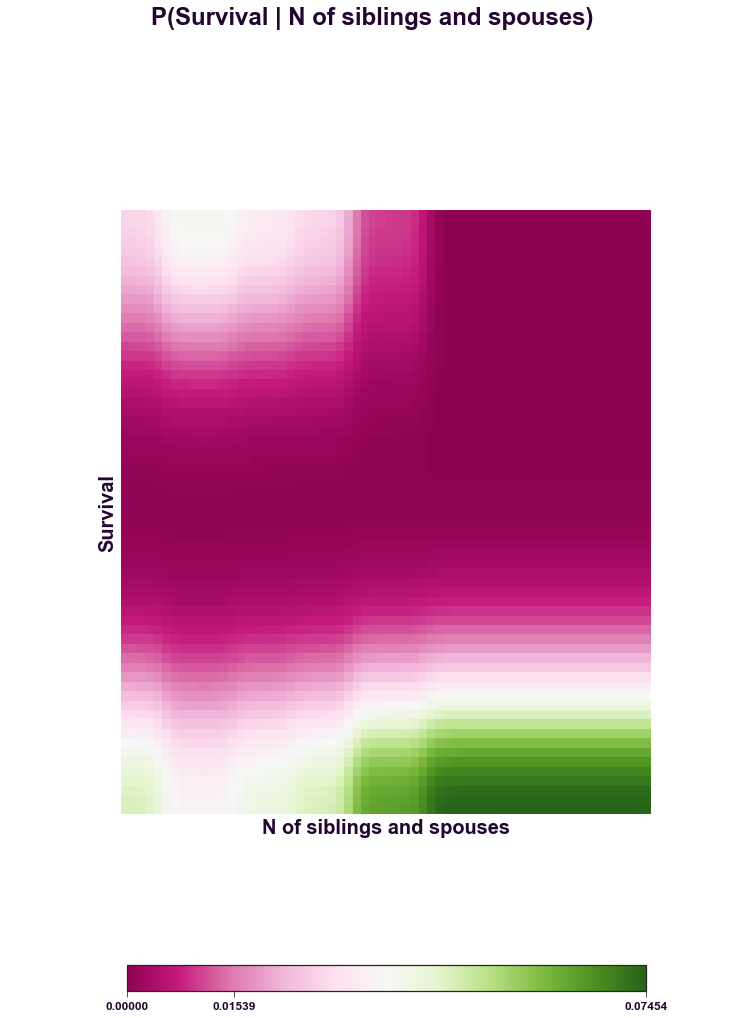

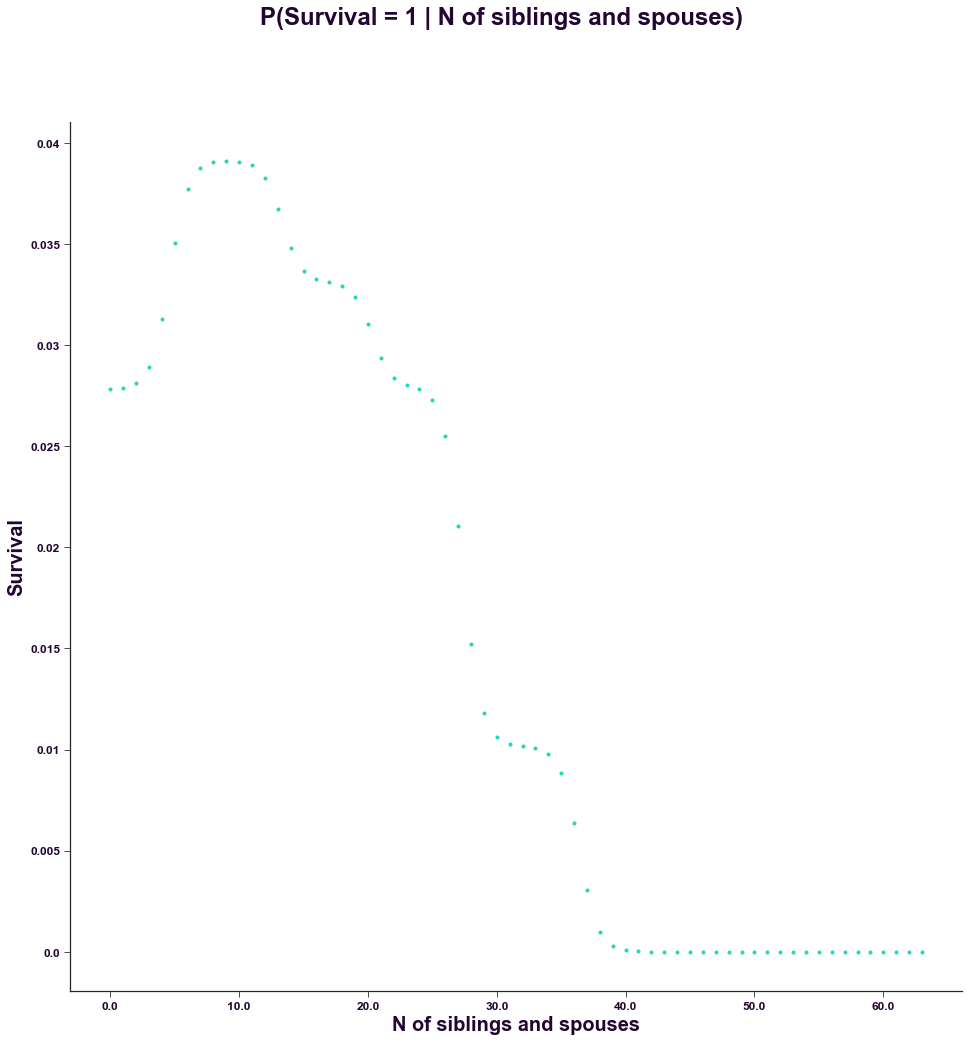

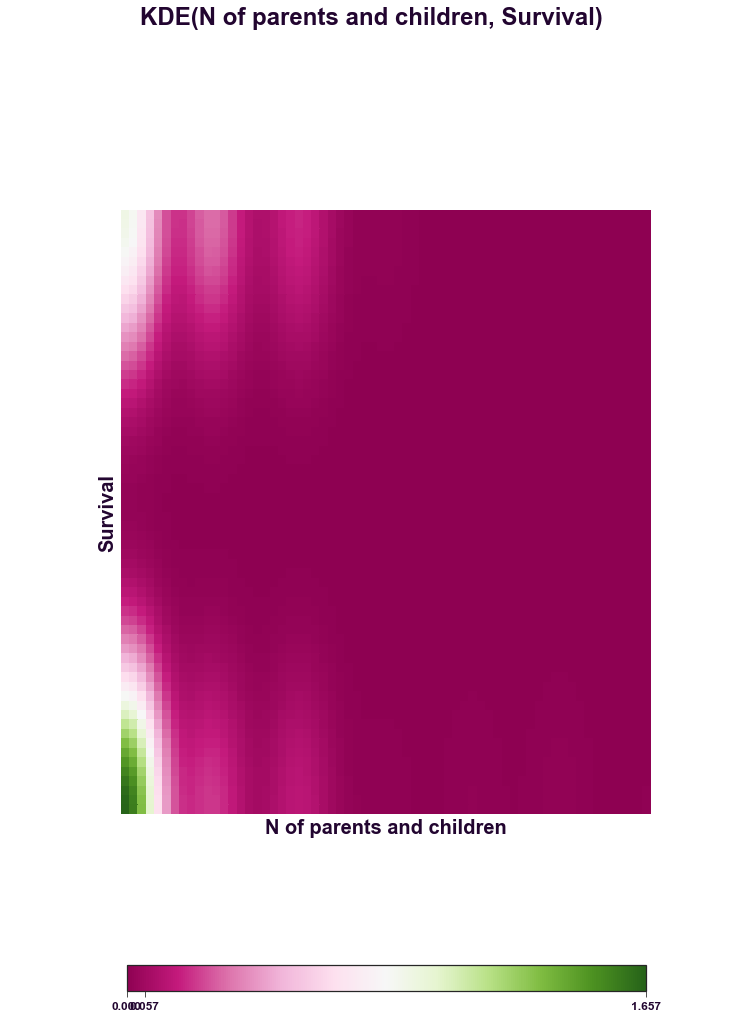

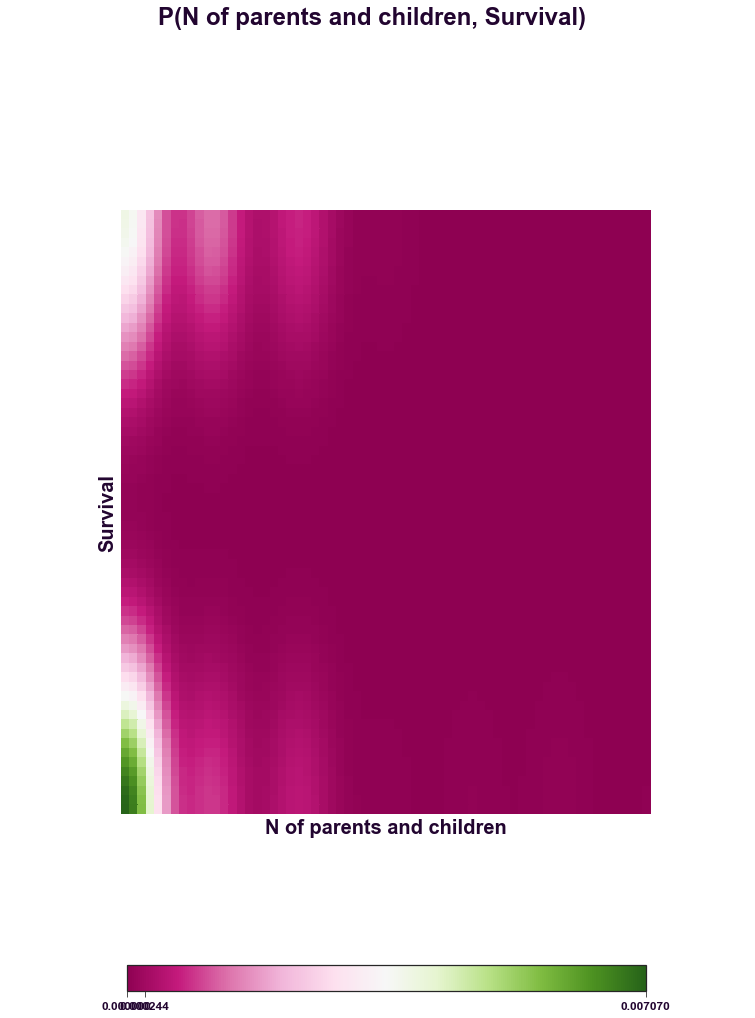

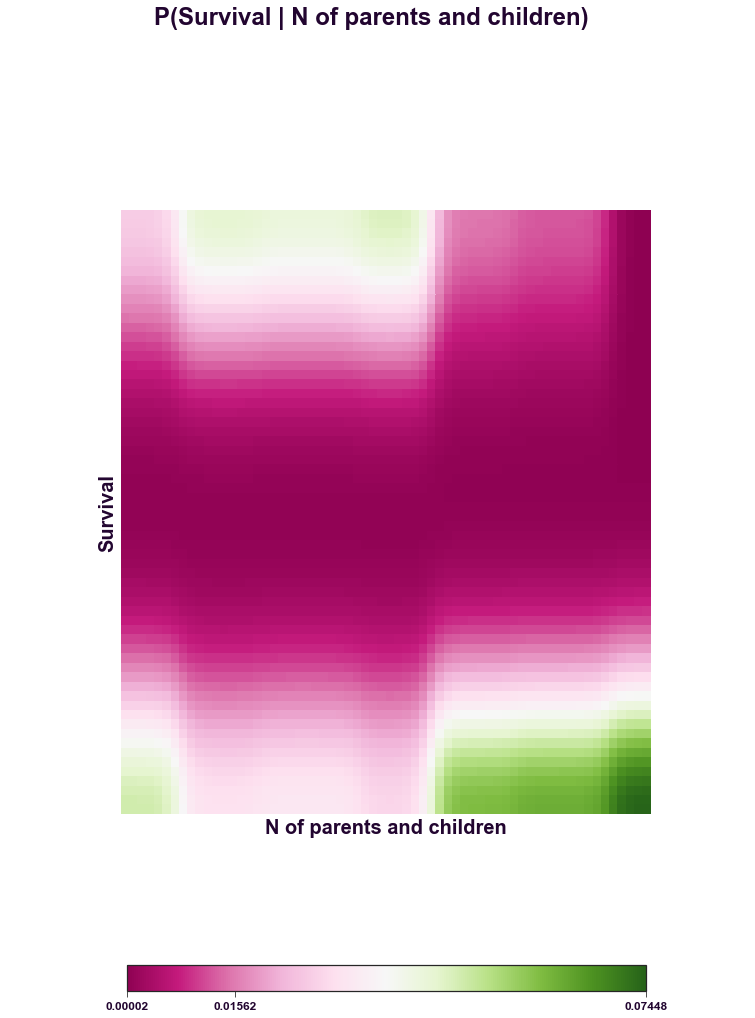

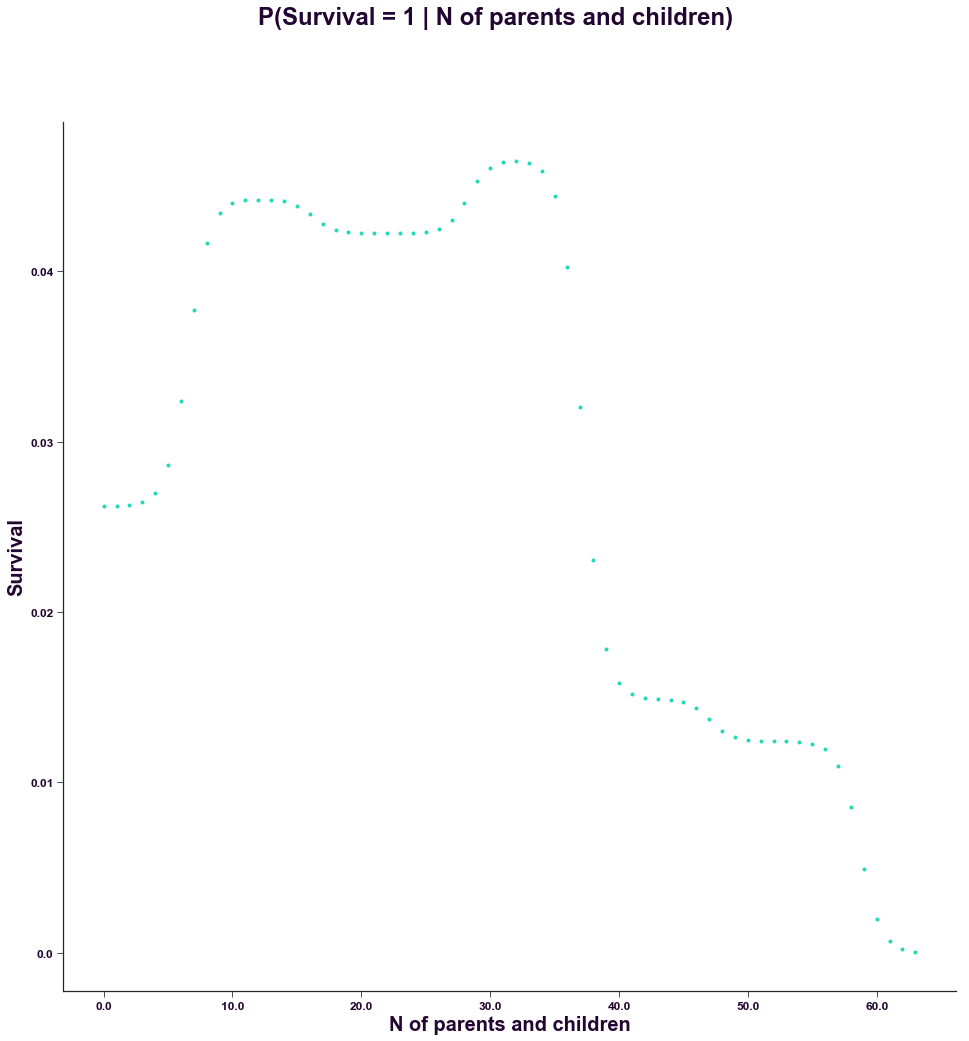

In [6]:
# Compute P(S = 1 | G)
p_s__g, p_s1__g = infer(
    [g, s],
    grid_size=grid_size,
    target=1,
    variable_names=[g_name, s_name],
    figure_size=figure_size)

# Compute P(S = 1 | A)
p_s__a, p_s1__a = infer(
    [a, s],
    grid_size=grid_size,
    target=1,
    variable_names=[a_name, s_name],
    figure_size=figure_size)

# Compute P(S = 1 | F)
p_s__f, p_s1__f = infer(
    [f, s],
    grid_size=grid_size,
    target=1,
    variable_names=[f_name, s_name],
    figure_size=figure_size)

# Compute P(S = 1 | NH)
p_s__nh, p_s1__nh = infer(
    [nh, s],
    grid_size=grid_size,
    target=1,
    variable_names=[nh_name, s_name],
    figure_size=figure_size)

# Compute P(S = 1 | NV)
p_s__nv, p_s1__nv = infer(
    [nv, s],
    grid_size=grid_size,
    target=1,
    variable_names=[nv_name, s_name],
    figure_size=figure_size)

# Compute P(S = 1 | A, F)


Infering assuming independence ...
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KDE instance
Number of variables: k_vars = 1
Number of samples:   nobs = 1045
Variable types:      c
BW selection method: normal_reference

KDE bandwidth: [ 0.12974018]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Infering ...
	Computing P(variables)...
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KDE instance
Number of variables: k_vars = 2
Number of samples:   nobs = 1045
Variable types:      cc
BW selection method: normal_reference

KDE bandwidth: [ 4.78573448  0.16357303]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


	Computing P(target variable | non-target variables) ...
	Getting target grid coordinates ...
	Computing P(target variable = target | non-target variables) ...


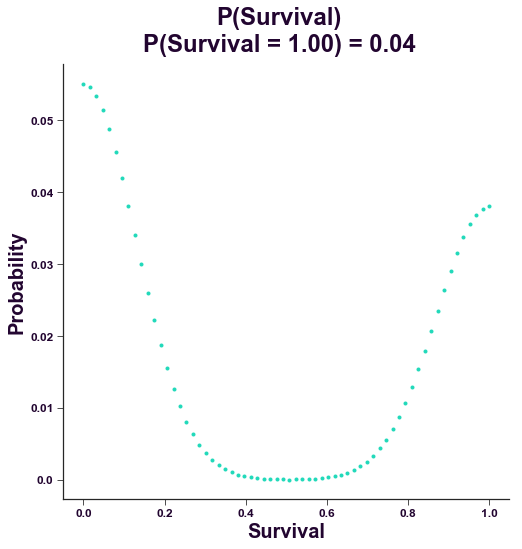

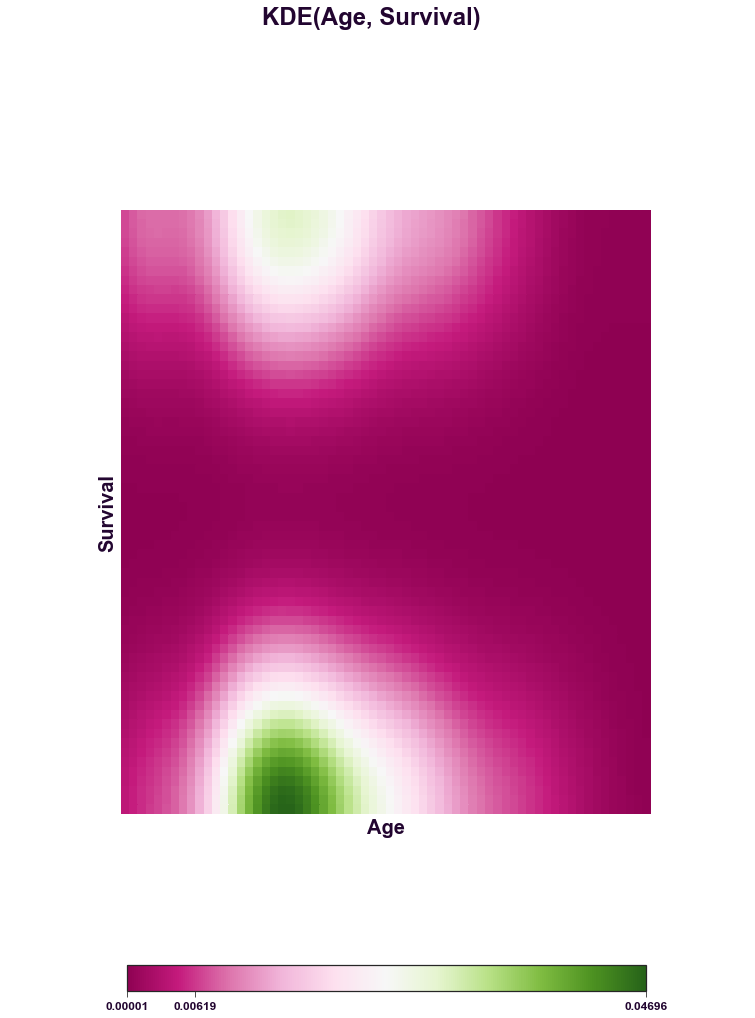

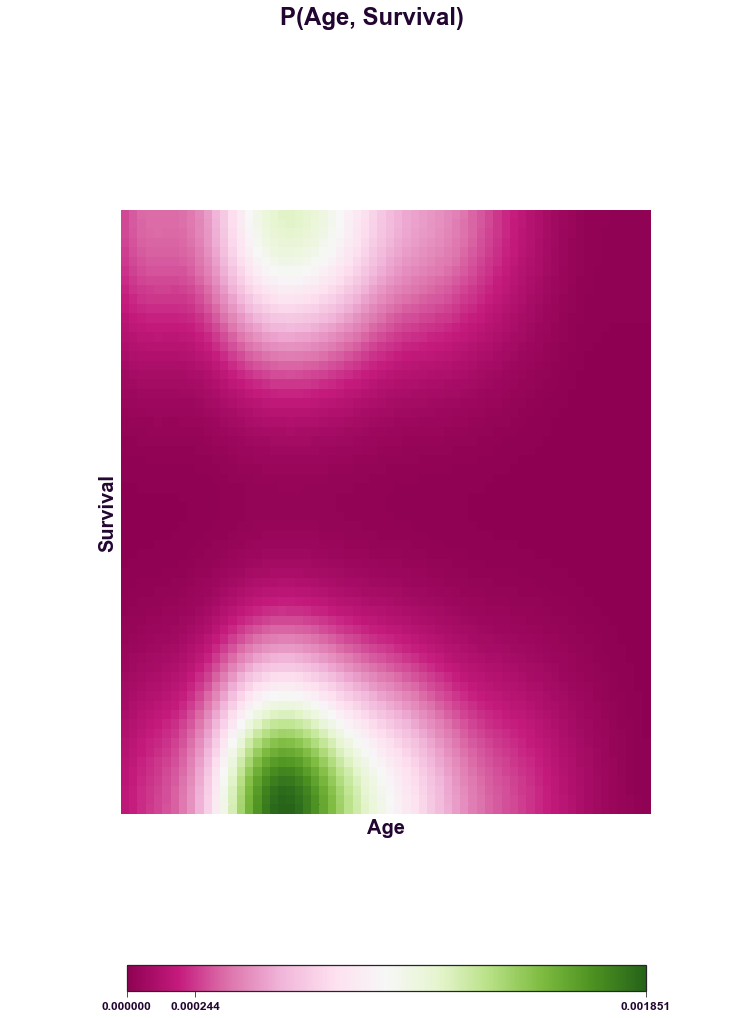

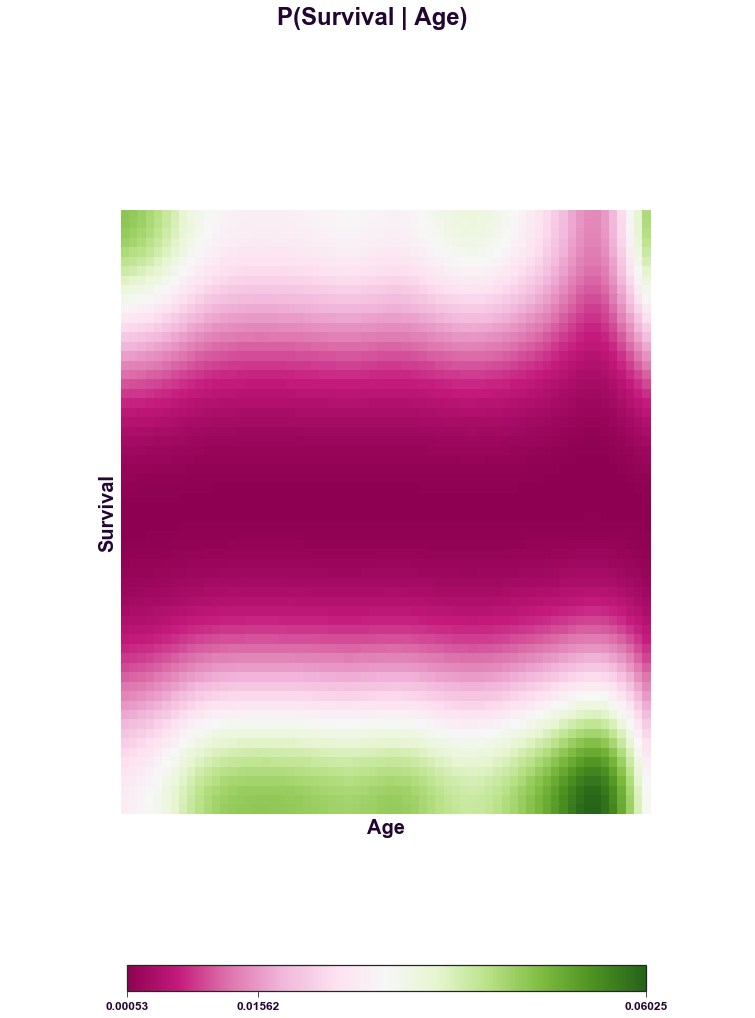

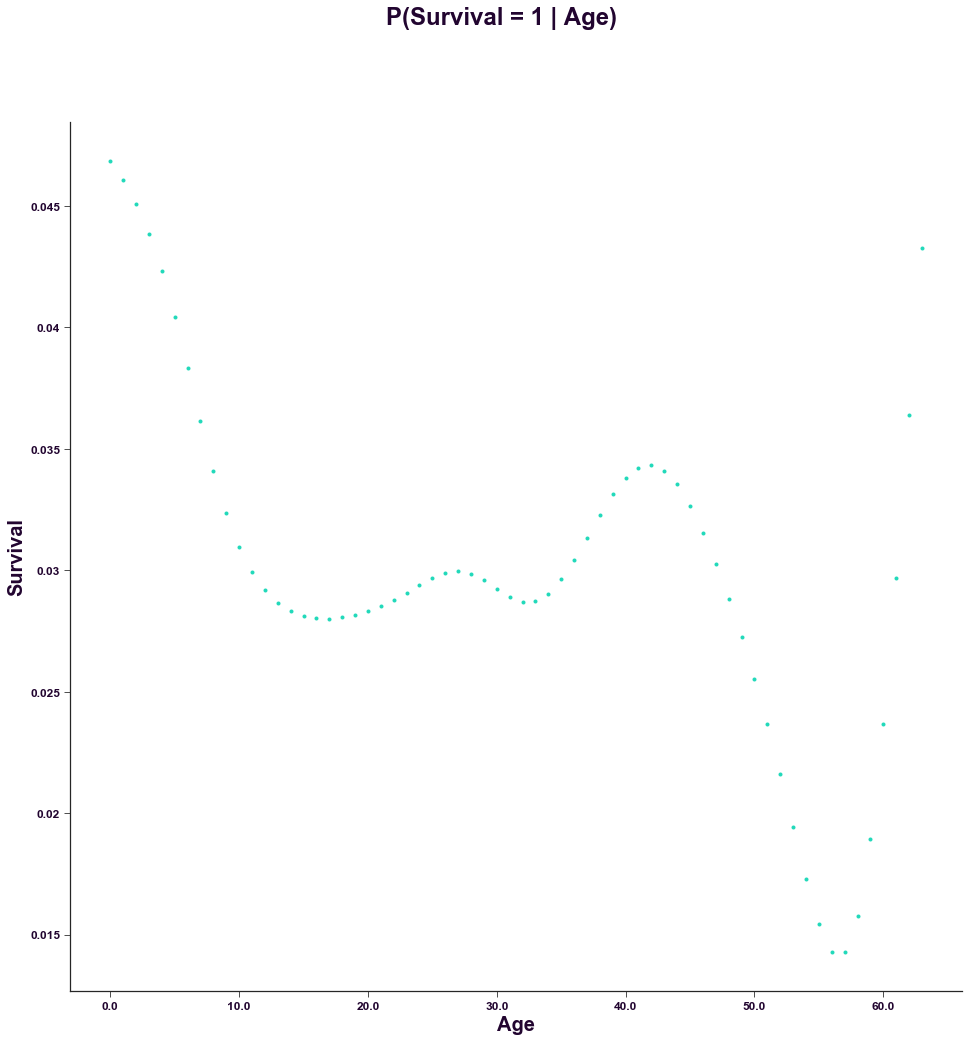


Infering ...
	Computing P(variables)...
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KDE instance
Number of variables: k_vars = 2
Number of samples:   nobs = 1045
Variable types:      cc
BW selection method: normal_reference

KDE bandwidth: [ 0.47161131  0.16357303]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	Computing P(target variable | non-target variables) ...
	Getting target grid coordinates ...
	Computing P(target variable = target | non-target variables) ...


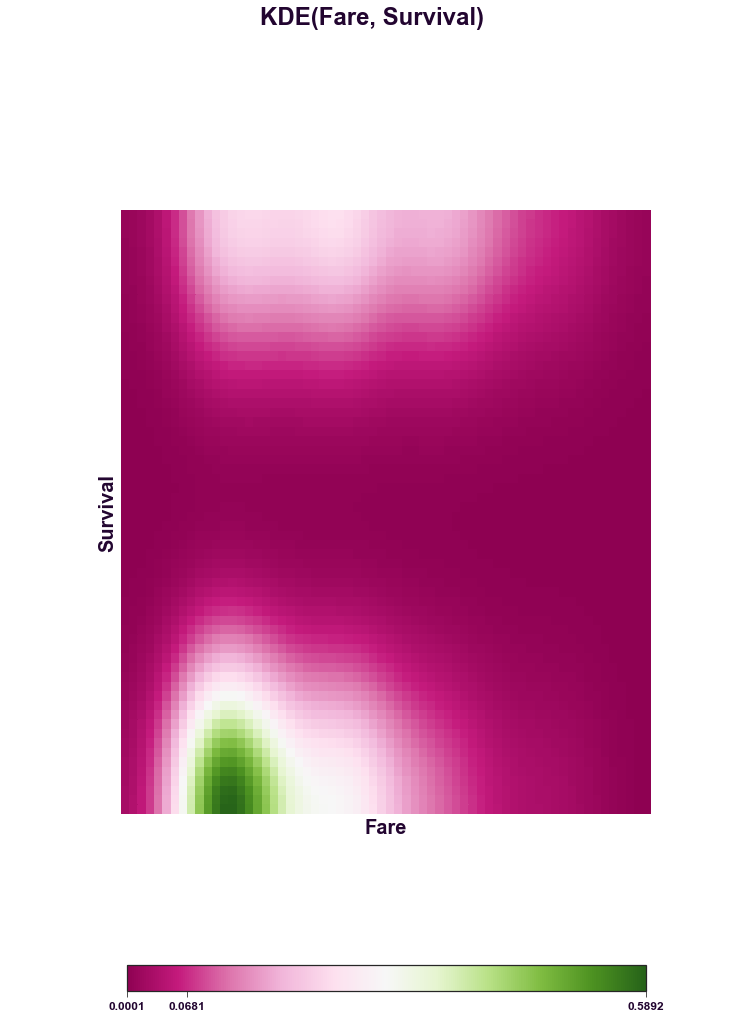

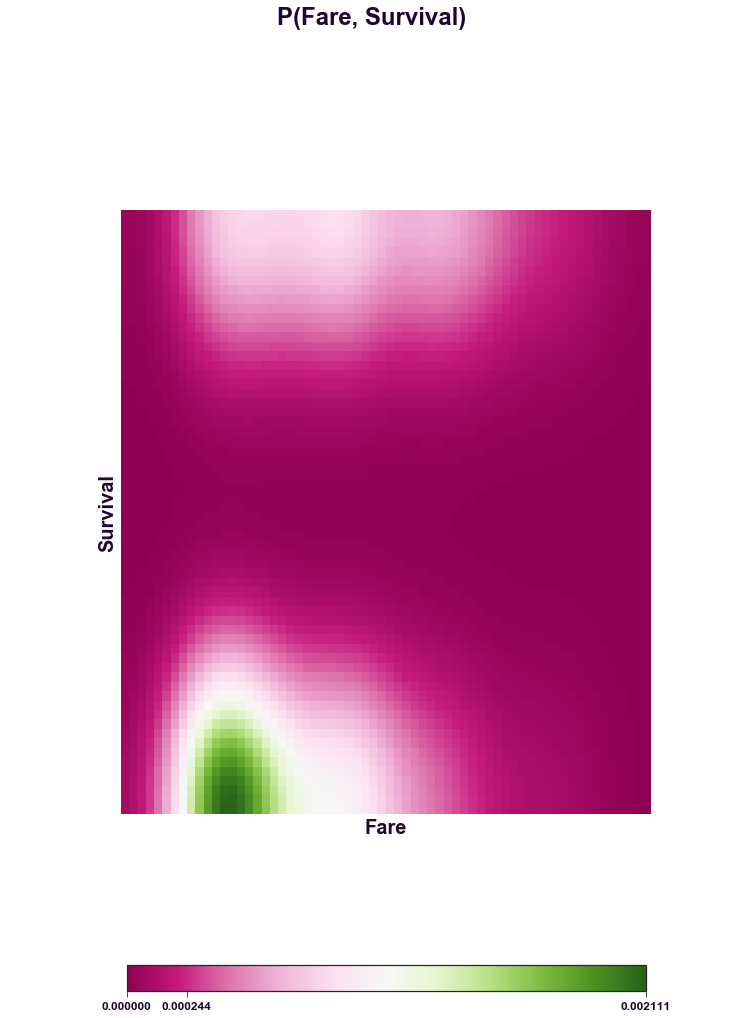

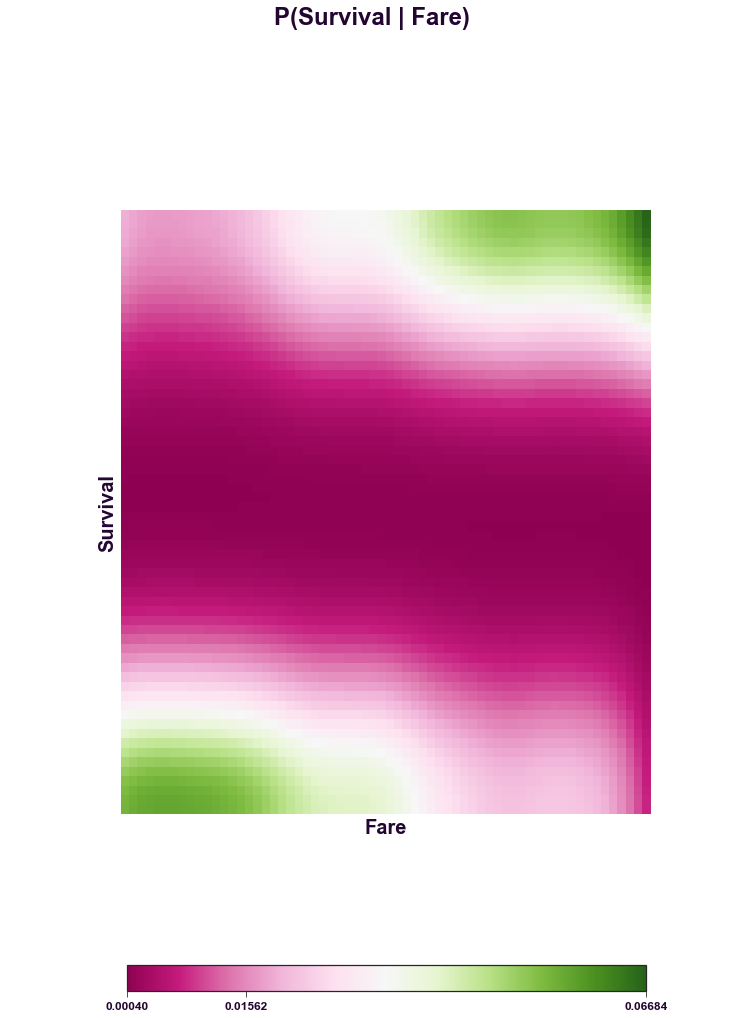

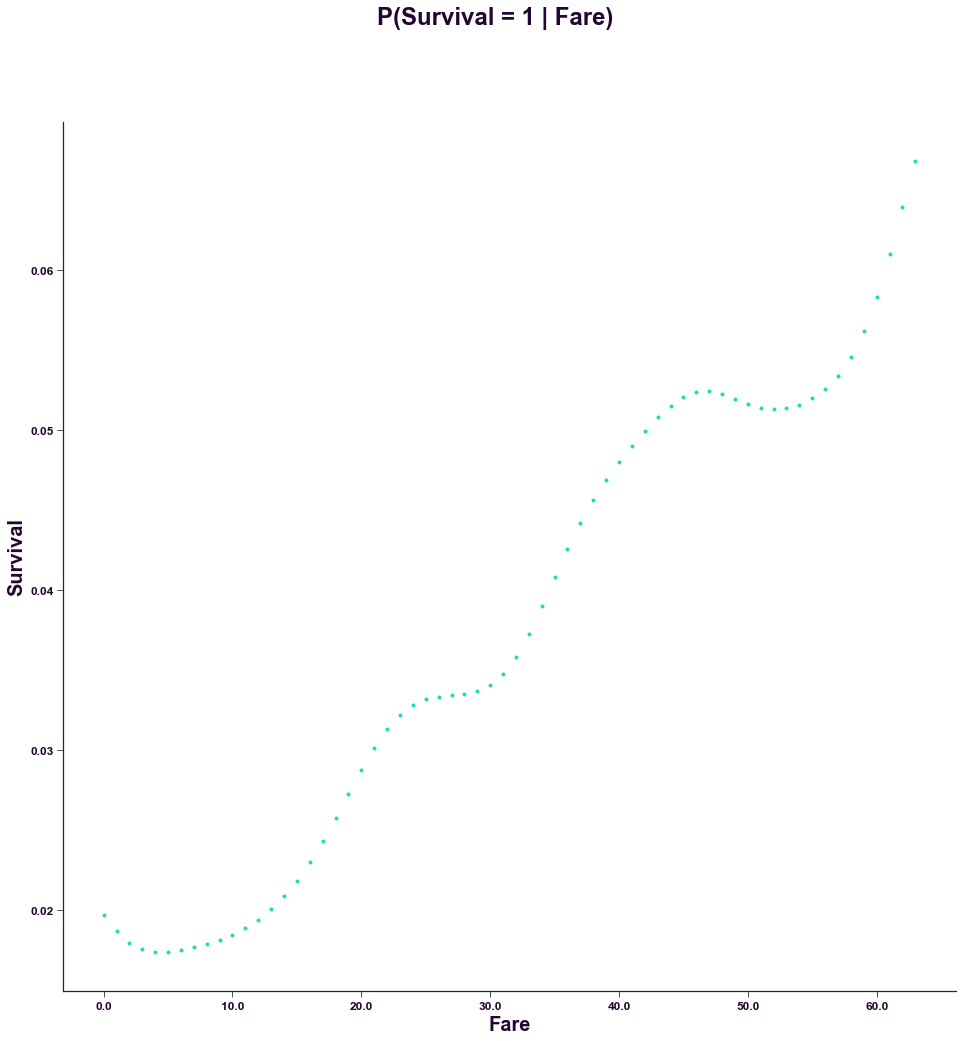


Infering ...
	Computing P(variables)...
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KDE instance
Number of variables: k_vars = 3
Number of samples:   nobs = 1045
Variable types:      ccc
BW selection method: normal_reference

KDE bandwidth: [ 5.64718897  0.55650354  0.19301694]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	Computing P(target variable | non-target variables) ...
	Getting target grid coordinates ...
	Computing P(target variable = target | non-target variables) ...


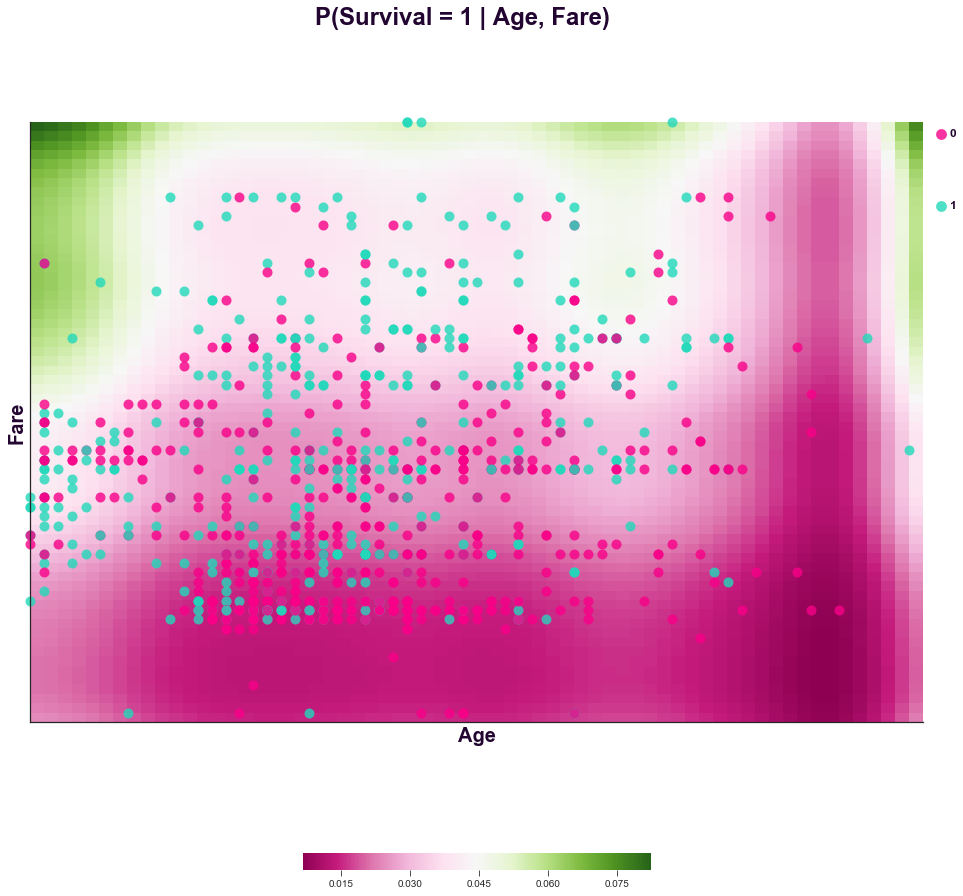

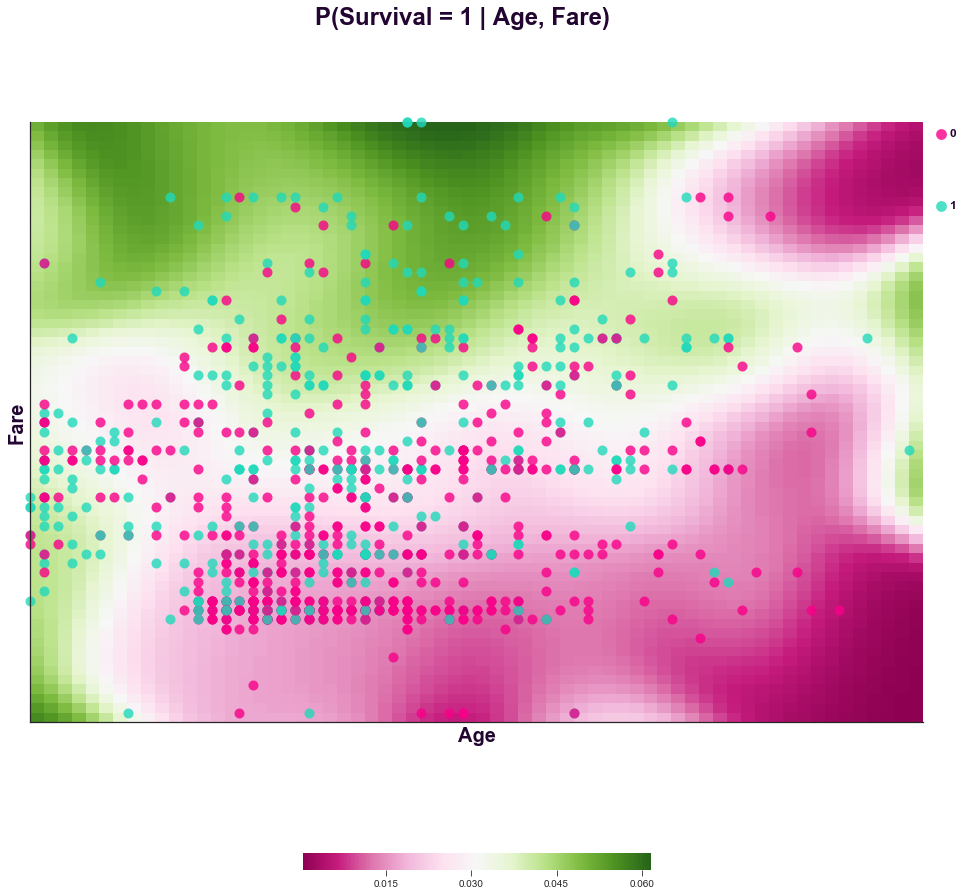

In [7]:
# Compute P(S = 1 | A, F) assuming independence
p_s__a_f_naive, p_s1__a_f_naive = infer_assuming_independence(
    [a, f, s],
    grid_size=grid_size,
    target=1,
    annotation_types=['binary'],
    markersize=10,
    markeredgewidth=0,
    variable_names=[a_name, f_name, s_name],
    figure_size=figure_size)

# Compute P(S = 1 | A, F)
p_s__a_f, p_s1__a_f = infer(
    [a, f, s],
    grid_size=grid_size,
    target=1,
    annotation_types=['binary'],
    markersize=10,
    markeredgewidth=0,
    variable_names=[a_name, f_name, s_name],
    figure_size=figure_size)

# Compute FPR, TPR, and p-value

In [8]:
p_types = [
    'P(S = 1 | G)',
    'P(S = 1 | A)',
    'P(S = 1 | F)',
    'P(S = 1 | NH)',
    'P(S = 1 | NV)',
    'P(S = 1 | A, F) (naive)',
    'P(S = 1 | A, F)',
]

roc_d = {
    p_type: {
        'fpr': None,
        'tpr': None,
        'p-value': 0
    }
    for p_type in p_types
}

for p_type, p_s1__v, vs in zip([
        'P(S = 1 | G)',
        'P(S = 1 | A)',
        'P(S = 1 | F)',
        'P(S = 1 | NH)',
        'P(S = 1 | NV)',
        'P(S = 1 | A, F) (naive)',
        'P(S = 1 | A, F)',
], [
        p_s1__g,
        p_s1__a,
        p_s1__f,
        p_s1__nh,
        p_s1__nv,
        p_s1__a_f_naive,
        p_s1__a_f,
], [
    [g],
    [a],
    [f],
    [nh],
    [nv],
    [a, f],
    [a, f],
]):

    p_s1__vv = np.empty(s.size)

    for i in range(s.size):

        coordinate = [[
            np.argmin(abs(np.linspace(v.min(), v.max(), grid_size) - v[i]))
        ] for v in vs]

        p_s1__vv[i] = p_s1__v[coordinate]

    fpr, tpr, t = roc_curve(s, (p_s1__vv - p_s1__vv.min()) /
                            (p_s1__vv.max() - p_s1__vv.min()))

    roc_d[p_type]['fpr'], roc_d[p_type]['tpr'] = fpr, tpr

    auc_ = auc(fpr, tpr)

    # Compute p-value with permutation test
    p_aucs = np.empty(n_permutations_for_roc_p_value)

    p_s = s.copy()

    for i in range(n_permutations_for_roc_p_value):

        np.random.shuffle(p_s)
        p_fpr, p_tpr, p_t = roc_curve(p_s, p_s1__vv)

        p_aucs[i] = auc(p_fpr, p_tpr)

    n_g_o_e = (auc_ <= p_aucs).sum()
    if n_g_o_e == 0:
        p_value = 1 / n_permutations_for_roc_p_value
    else:
        p_value = n_g_o_e / n_permutations_for_roc_p_value

    roc_d[p_type]['p-value'] = p_value

# Plot ROC

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


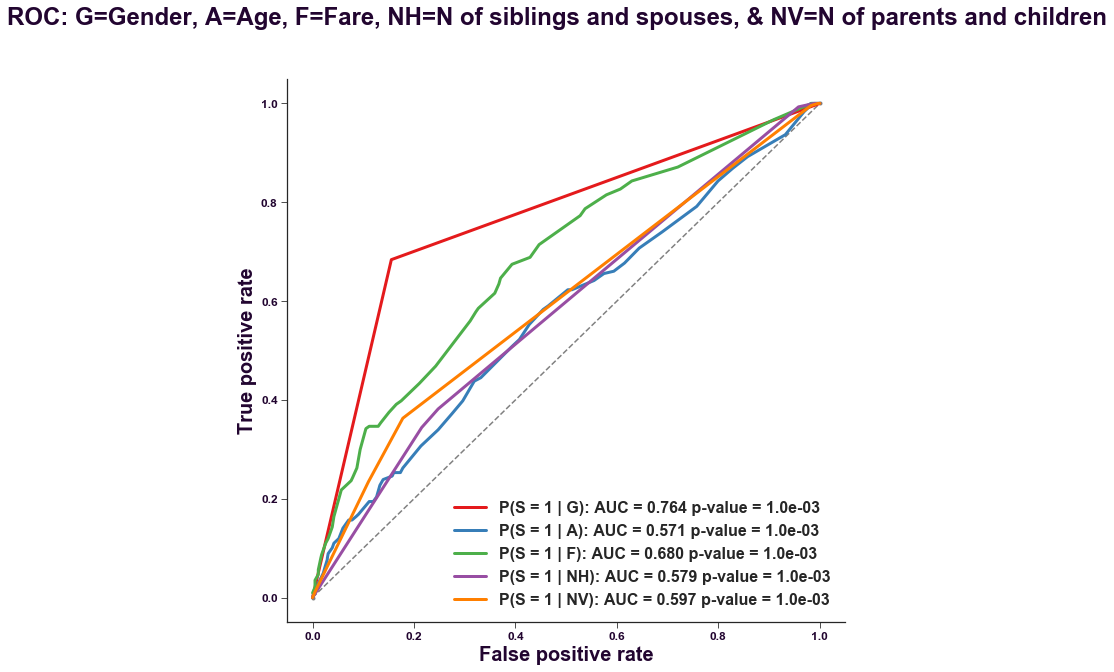

In [9]:
mpl.pyplot.figure(figsize=(10, 10))

ax = mpl.pyplot.gca()

plot.plot_points(
    ax.axis()[:2], ax.axis()[2:], linestyle='--', ax=ax, color='#808080')

for k, c in zip(
    [
        'P(S = 1 | G)',
        'P(S = 1 | A)',
        'P(S = 1 | F)',
        'P(S = 1 | NH)',
        'P(S = 1 | NV)',
        #         'P(S = 1 | A, F) (naive)',
        #         'P(S = 1 | A, F)',
    ],
    [
        mpl.cm.Set1(0),
        mpl.cm.Set1(1),
        mpl.cm.Set1(2),
        mpl.cm.Set1(3),
        mpl.cm.Set1(4),
        #         '#888888',
        #         '#9017E6',
        #         '#4E41D9',
        #         '#20D9BA',
        #         '#F80088',
    ]):

    fpr, tpr = roc_d[k]['fpr'], roc_d[k]['tpr']

    label = '{}: AUC = {:0.3f} p-value = {:0.1e}'.format(
        k, auc(fpr, tpr), roc_d[k]['p-value'])

    plot.plot_points(
        fpr,
        tpr,
        linestyle='-',
        ax=ax,
        linewidth=3,
        markersize=0,
        color=c,
        label=label,
        figure_size=figure_size)

title = 'ROC: G={}, A={}, F={}, NH={}, & NV={}'.format(g_name, a_name, f_name,
                                                       nh_name, nv_name)
plot.decorate(
    ax,
    legend_loc='lower right',
    xticklabels_kwargs={'rotation': 0},
    title=title,
    xlabel='False positive rate',
    ylabel='True positive rate')

plot.save_plot('roc.png')

# Make Bayesian nomogram

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


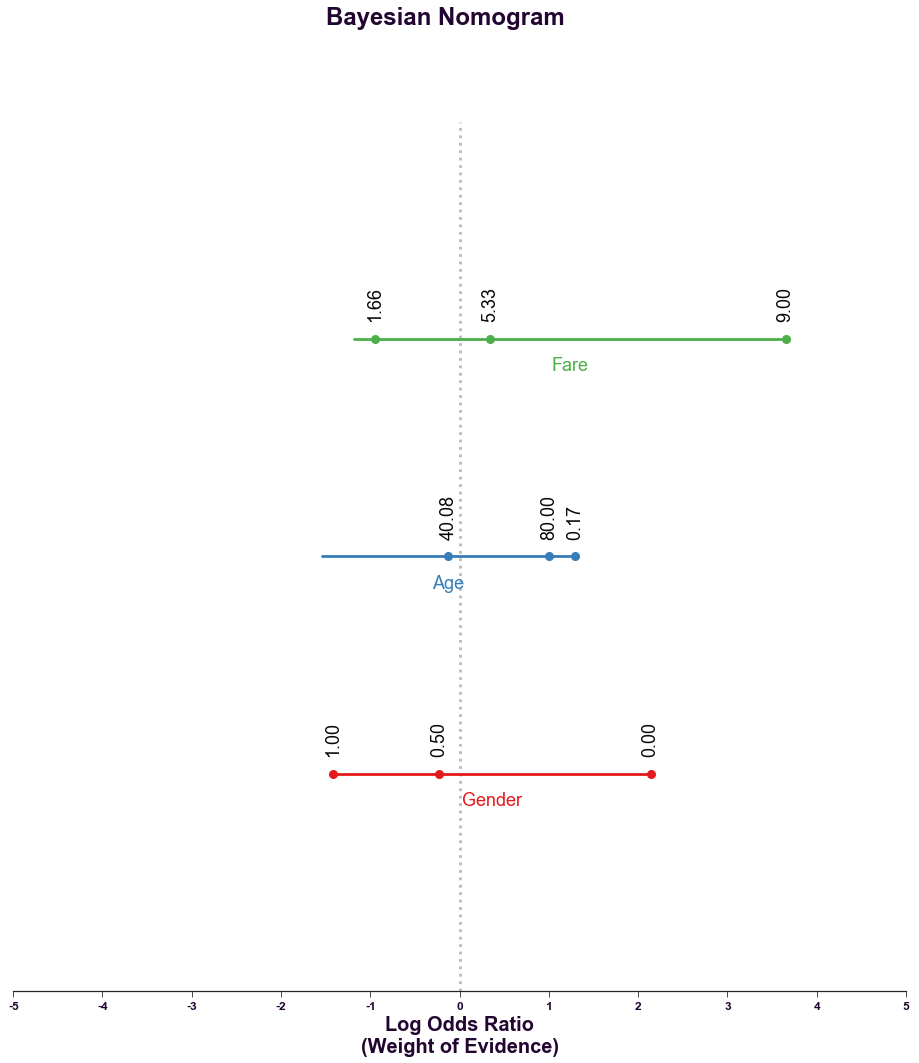

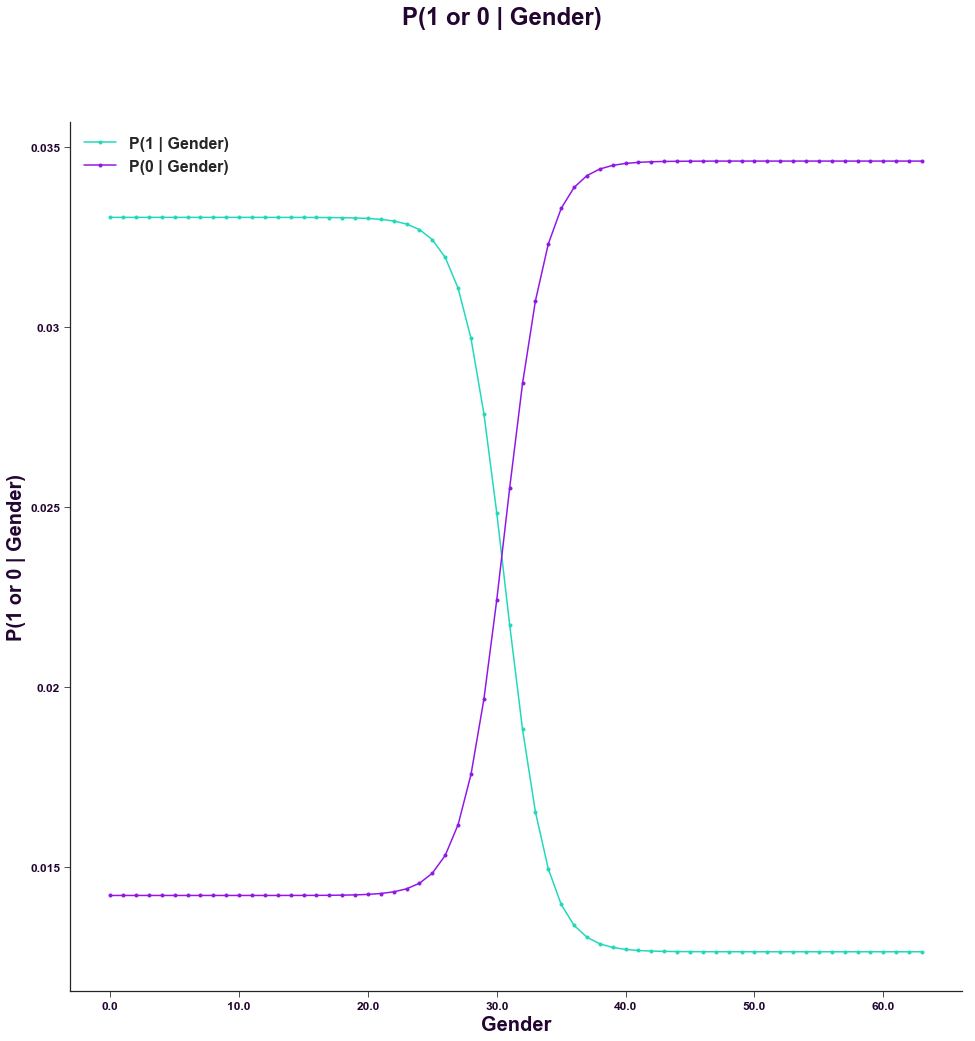

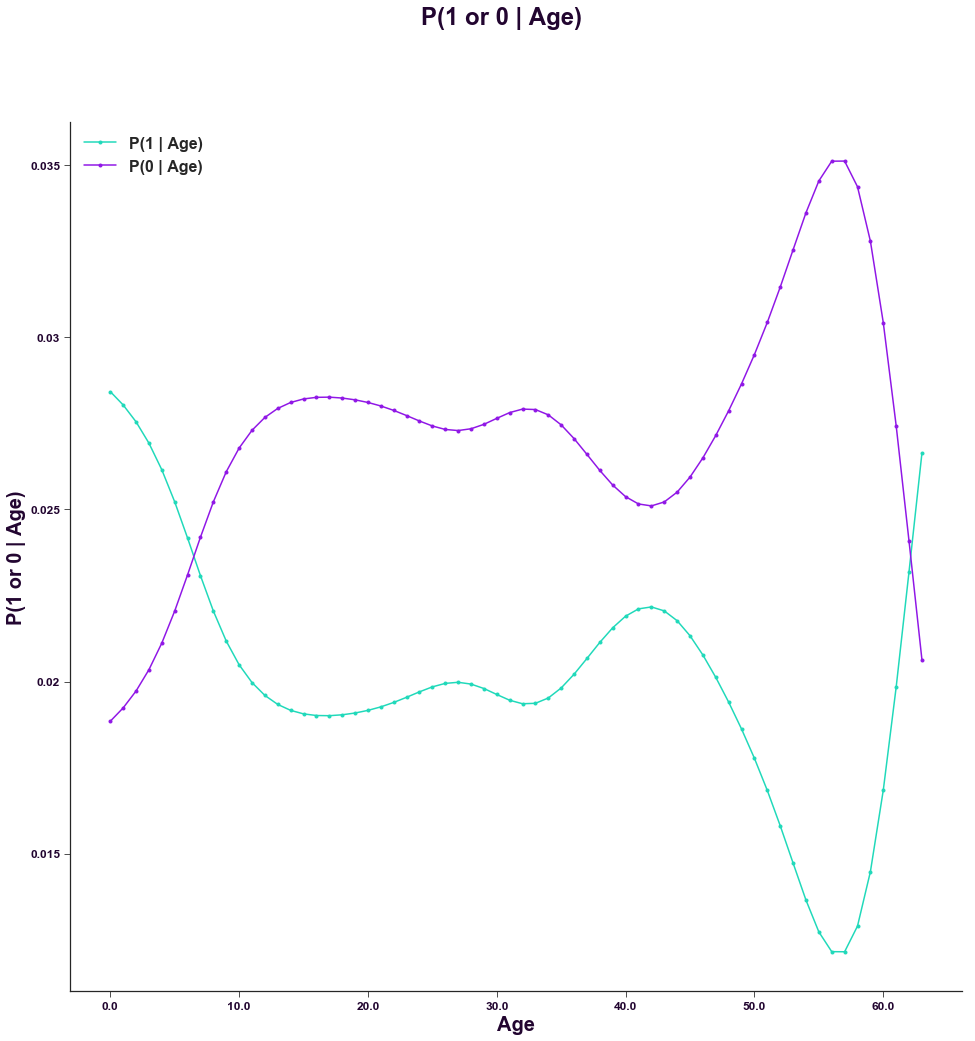

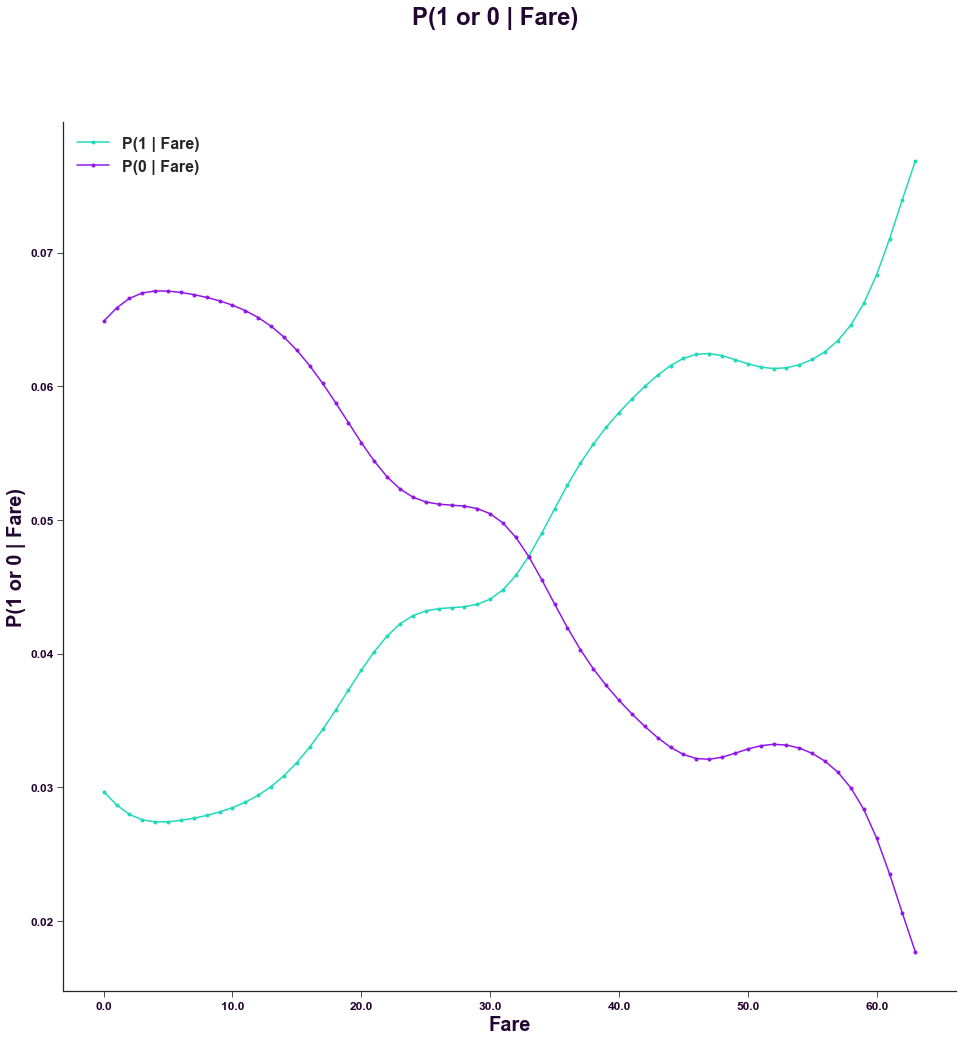

In [11]:
plot_bayesian_nomogram(
    [
        g_name,
        a_name,
        f_name,
        #         nv_name,
        #         nh_name,
    ],
    [
        g,
        a,
        f,
        #         nv,
        #         nh,
    ],
    [
        p_s__g,
        p_s__a,
        p_s__f,
        #         p_s__nv,
        #         p_s__nh,
    ],
    p_s1,
    1 - p_s1,
    n_lors_marks=3,
    figure_size=figure_size,
    file_path='nomogram.png')

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


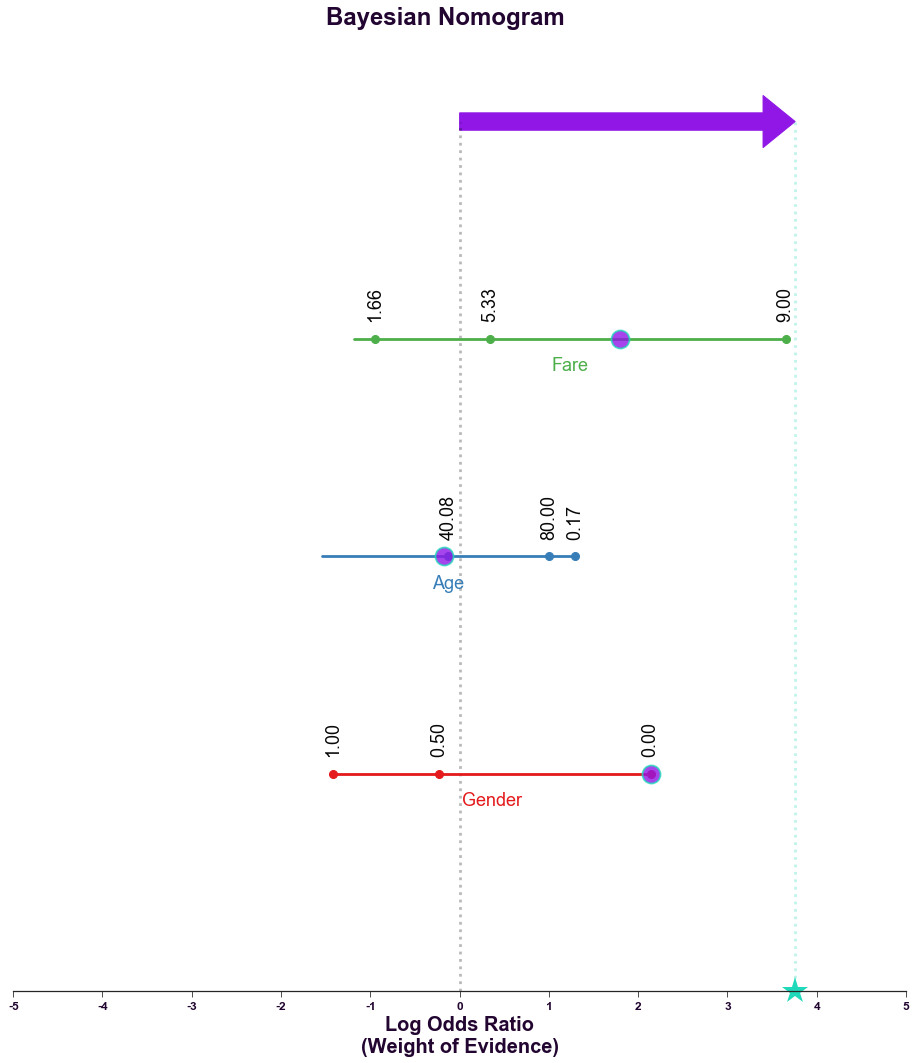

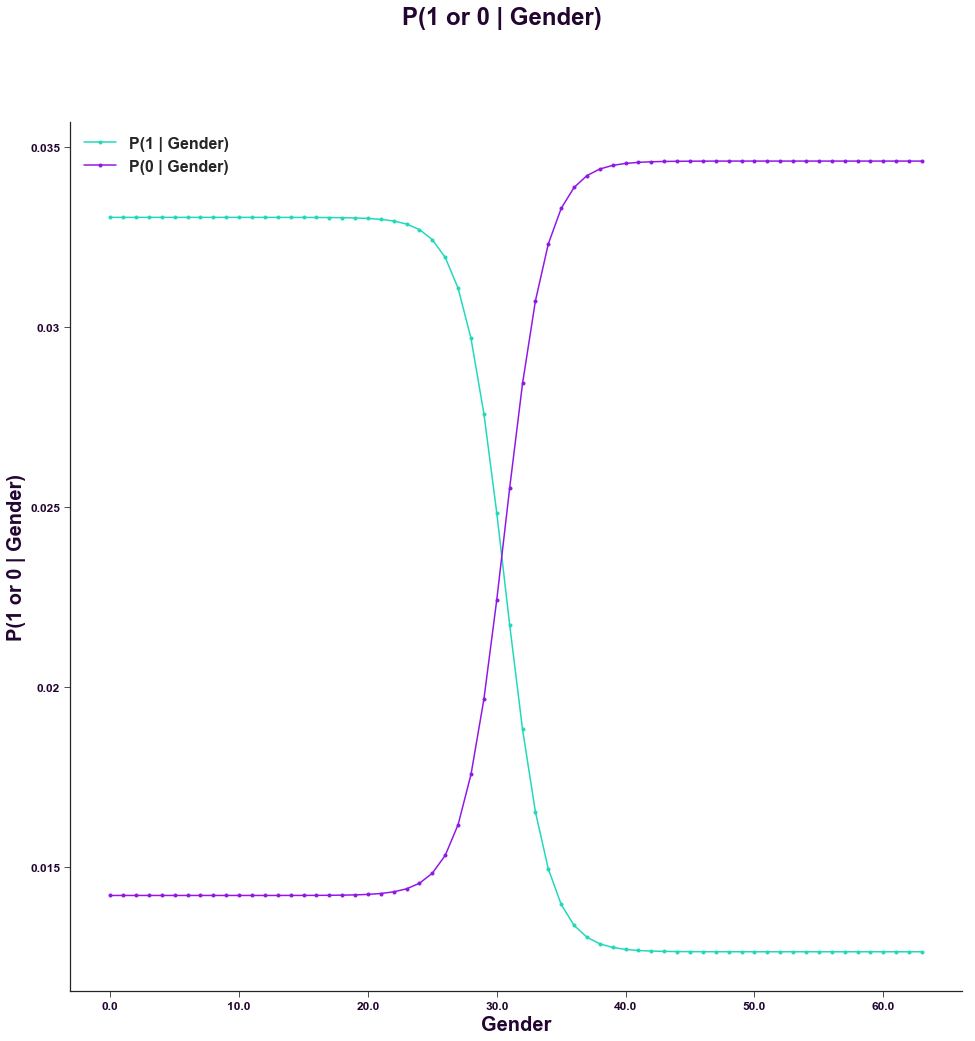

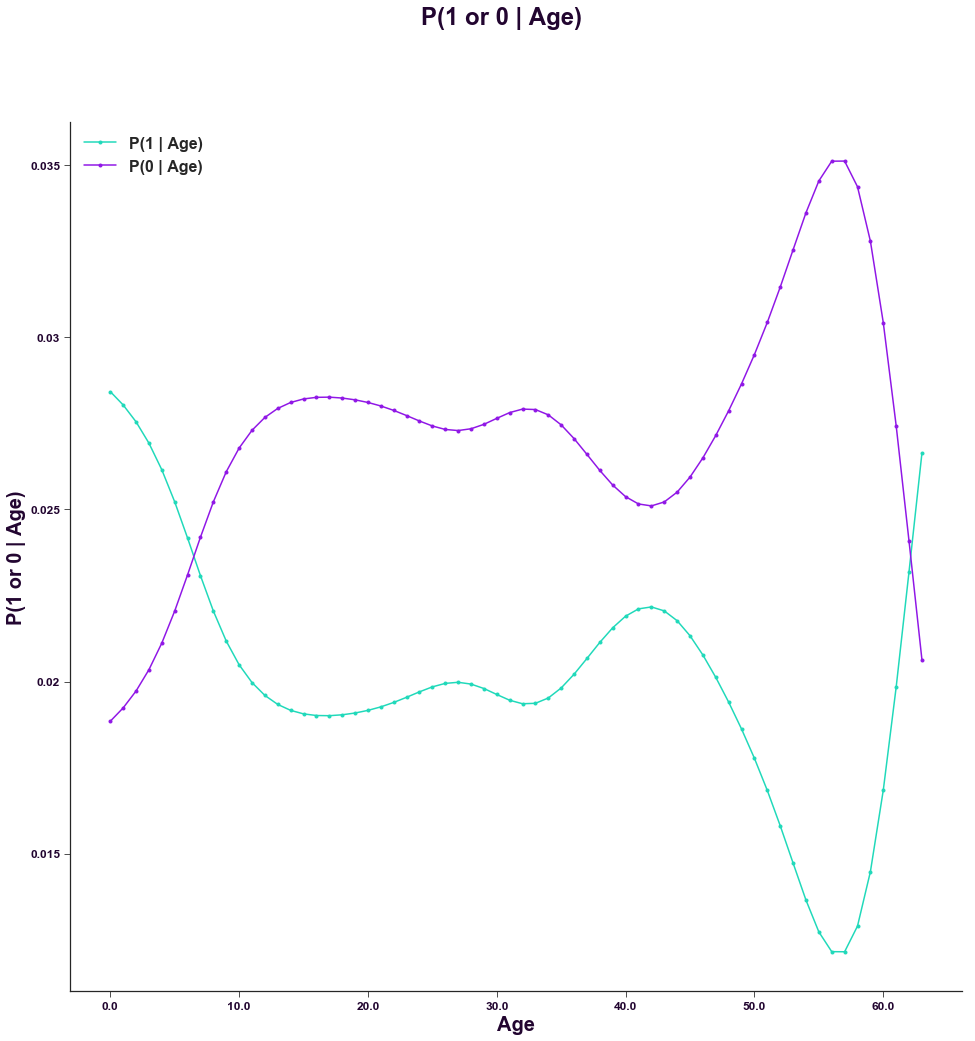

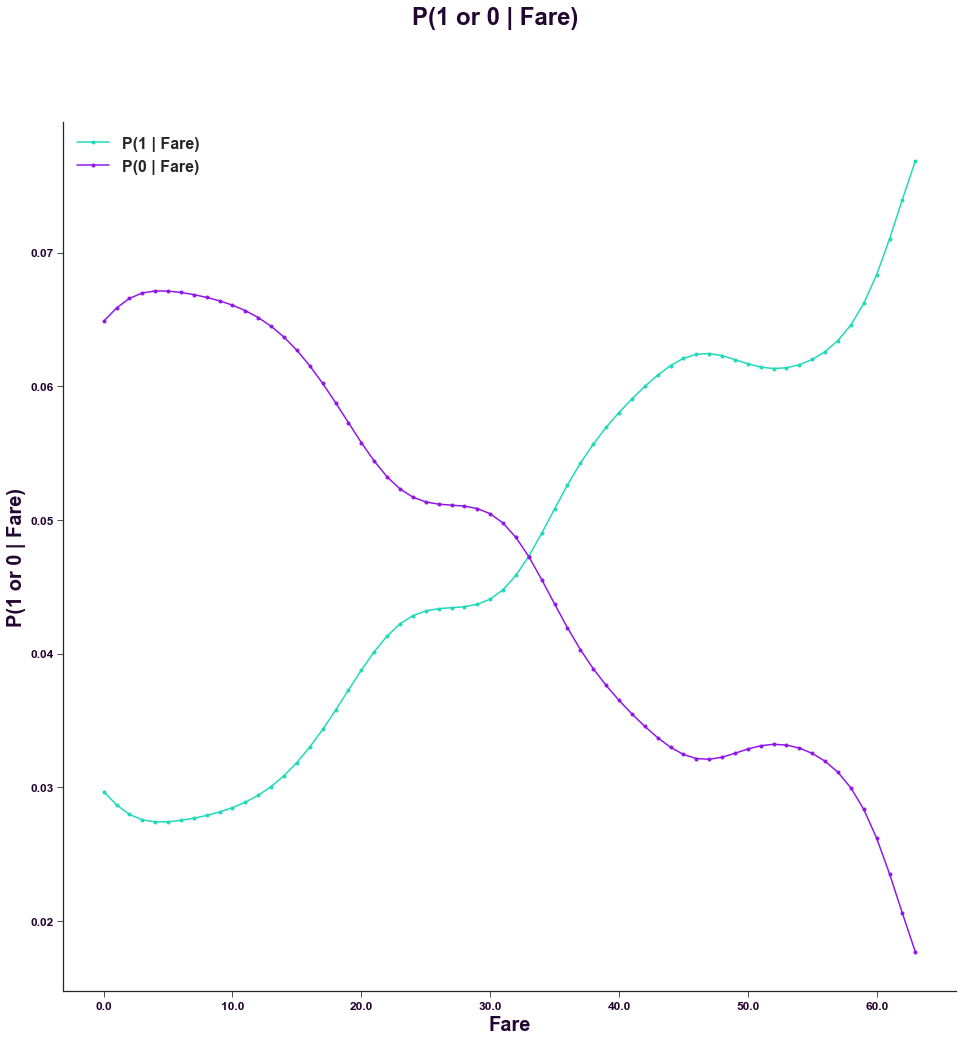

In [13]:
gender_ = 'female'
age_ = 18
fare_ = 300

plot_bayesian_nomogram(
    [
        g_name,
        a_name,
        f_name,
        #         nv_name,
        #         nh_name,
    ],
    [
        g,
        a,
        f,
        #         nv,
        #         nh,
    ],
    [
        p_s__g,
        p_s__a,
        p_s__f,
        #         p_s__nv,
        #         p_s__nh,
    ],
    p_s1,
    1 - p_s1,
    sample=[
        int(gender_=='male'),
        age_,
        np.log2(fare_),
        #         2,
        #         2,
    ],
    n_lors_marks=3,
    figure_size=figure_size,
    file_path='nomogram_with_sample.png')